# Predicting Daily Calories by Minute-Based Activities

In this notebook, I will try to predict the number of calories using each activity a person has done. The per minute data will be used.

Calories are measurement of energy that the body use or intake. The amount of calories burned per a period of time differs depending on age, physique, gender, and daily activity.

source: https://www.nhs.uk/live-well/healthy-weight/managing-your-weight/understanding-calories/


I will use the daily_fitbit_sema_df_unprocessed dataset since it provides much more information necessary for calories burned prediction.

## Data Info

DemographicVO2 = Maximal Oxygen Consumption (VO2 Max) 

# Data Loading

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/fitbit_fitabase/daily_fitbit_sema_df_unprocessed.csv')

In [3]:
df

Unnamed: 0                        id        date  nightly_temperature  \
0              0  621e2e8e67b776a24055b564  2021-05-24            34.137687   
1              1  621e2e8e67b776a24055b564  2021-05-25            33.794544   
2              2  621e2e8e67b776a24055b564  2021-05-26            34.611011   
3              3  621e2e8e67b776a24055b564  2021-05-27            34.408304   
4              4  621e2e8e67b776a24055b564  2021-05-28            34.178922   
...          ...                       ...         ...                  ...   
7405        7405  621e362467b776a2404ad513  2021-05-18                  NaN   
7406        7406  621e36f967b776a240e5e7c9  2021-05-20                  NaN   
7407        7407  621e362467b776a2404ad513  2021-05-23                  NaN   
7408        7408  621e339967b776a240e502de  2021-11-19                  NaN   
7409        7409  621e339967b776a240e502de  2021-11-20                  NaN   

      nremhr    rmssd  spo2  full_sleep_breathing_rate  stress_score  \
0     57.432   89.603   NaN                       14.8          78.0   
1     57.681   94.303   NaN                       15.8          80.0   
2     57.481  119.212   NaN                       14.6          84.0   
3     57.493  111.709   NaN                       14.8          82.0   
4     56.750  103.034   NaN                       15.2          81.0   
...      ...      ...   ...                        ...           ...   
7405     NaN      NaN   NaN                        NaN           NaN   
7406     NaN      NaN   NaN                        NaN           NaN   
7407     NaN      NaN   NaN                        NaN           NaN   
7408     NaN      NaN   NaN                        NaN           NaN   
7409     NaN      NaN   NaN                        NaN           NaN   

      sleep_points_percentage  ...  TENSE/ANXIOUS  TIRED  ENTERTAINMENT  GYM  \
0                    0.833333  ...            NaN    NaN            NaN  NaN   
1                    0.833333  ...            0.0    1.0            0.0  0.0   
2                    0.966667  ...            0.0    0.0            0.0  0.0   
3                    0.933333  ...            0.0    0.0            0.0  0.0   
4                    0.866667  ...            0.0    0.0            0.0  0.0   
...                       ...  ...            ...    ...            ...  ...   
7405                      NaN  ...            0.0    0.0            0.0  0.0   
7406                      NaN  ...            0.0    1.0            0.0  0.0   
7407                      NaN  ...            0.0    0.0            0.0  0.0   
7408                      NaN  ...            0.0    0.0            0.0  0.0   
7409                      NaN  ...            0.0    0.0            0.0  0.0   

      HOME  HOME_OFFICE  OTHER OUTDOORS  TRANSIT  WORK/SCHOOL  
0      NaN          NaN    NaN      NaN      NaN          NaN  
1      0.0          0.0    0.0      1.0      0.0          1.0  
2      0.0          0.0    0.0      1.0      0.0          0.0  
3      1.0          0.0    0.0      1.0      0.0          1.0  
4      0.0          0.0    0.0      1.0      0.0          0.0  
...    ...          ...    ...      ...      ...          ...  
7405   1.0          0.0    0.0      0.0      0.0          0.0  
7406   1.0          0.0    0.0      0.0      0.0          1.0  
7407   0.0          0.0    0.0      0.0      1.0          0.0  
7408   1.0          0.0    0.0      0.0      0.0          0.0  
7409   1.0          0.0    0.0      0.0      0.0          0.0  

[7410 rows x 63 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'nightly_temperature', 'nremhr', 'rmssd',
       'spo2', 'full_sleep_breathing_rate', 'stress_score',
       'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'badgeType', 'calories', 'filteredDemographicVO2Max', 'distance',
       'activityType', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'mindfulness_session', 'scl_avg', 'resting_hr', 'sleep_duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'min_goal', 'max_goal', 'step_goal_label',
       'ALERT',

In [5]:
df.drop([
    'Unnamed: 0', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME_OFFICE', 'OTHER','OUTDOORS', 'TRANSIT', 'WORK/SCHOOL'
], axis=1, inplace=True)

# Data Exploration

<AxesSubplot: title={'center': 'Gender'}, ylabel='gender'>

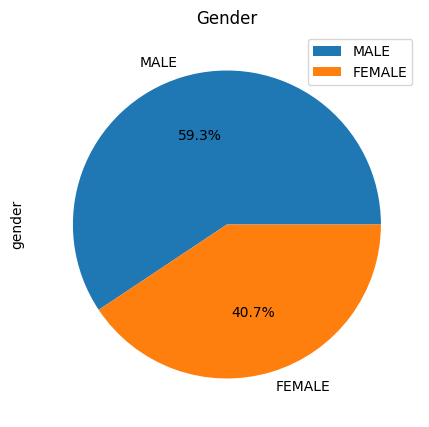

In [6]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5), title='Gender', legend=True)

In [7]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'min_goal', 'max_goal',
       'step_goal_label'],
      dtype='object')

<AxesSubplot: >

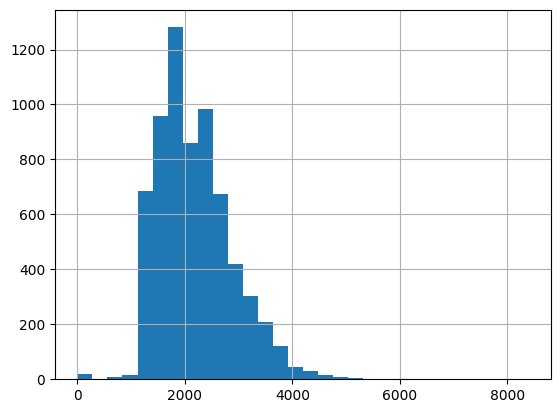

In [8]:
df['calories'].hist(bins=30)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7410 non-null   object 
 1   date                              7410 non-null   object 
 2   nightly_temperature               3359 non-null   float64
 3   nremhr                            2475 non-null   float64
 4   rmssd                             2475 non-null   float64
 5   spo2                              1270 non-null   float64
 6   full_sleep_breathing_rate         2495 non-null   float64
 7   stress_score                      1876 non-null   float64
 8   sleep_points_percentage           1876 non-null   float64
 9   exertion_points_percentage        1876 non-null   float64
 10  responsiveness_points_percentage  1876 non-null   float64
 11  daily_temperature_variation       3304 non-null   float64
 12  badgeT

In [10]:
# iterate over all columns and print its length
for col in df.columns:
    missing_ratio = df[col].isna().sum() / len(df[col])
    print(f'{col} has {missing_ratio:.2%} missing values')
    if(missing_ratio > 0.45):
        df.drop(col, axis=1, inplace=True)
        print(f'{col} dropped')
    print('---')

id has 0.00% missing values
---
date has 0.00% missing values
---
nightly_temperature has 54.67% missing values
nightly_temperature dropped
---
nremhr has 66.60% missing values
nremhr dropped
---
rmssd has 66.60% missing values
rmssd dropped
---
spo2 has 82.86% missing values
spo2 dropped
---
full_sleep_breathing_rate has 66.33% missing values
full_sleep_breathing_rate dropped
---
stress_score has 74.68% missing values
stress_score dropped
---
sleep_points_percentage has 74.68% missing values
sleep_points_percentage dropped
---
exertion_points_percentage has 74.68% missing values
exertion_points_percentage dropped
---
responsiveness_points_percentage has 74.68% missing values
responsiveness_points_percentage dropped
---
daily_temperature_variation has 55.41% missing values
daily_temperature_variation dropped
---
badgeType has 93.05% missing values
badgeType dropped
---
calories has 10.12% missing values
---
filteredDemographicVO2Max has 35.32% missing values
---
distance has 35.53% mis

In [11]:
df.isna().sum()

id                                 0
date                               0
calories                         750
filteredDemographicVO2Max       2617
distance                        2633
bpm                             2606
lightly_active_minutes           327
moderately_active_minutes        327
very_active_minutes              327
sedentary_minutes                327
mindfulness_session              299
resting_hr                      2988
steps                           2633
minutes_in_default_zone_1       2602
minutes_below_default_zone_1    2602
minutes_in_default_zone_2       2602
minutes_in_default_zone_3       2602
age                              614
gender                           370
bmi                              614
dtype: int64

In [12]:
df

id        date  calories  \
0     621e2e8e67b776a24055b564  2021-05-24   2351.59   
1     621e2e8e67b776a24055b564  2021-05-25   2332.08   
2     621e2e8e67b776a24055b564  2021-05-26   2262.30   
3     621e2e8e67b776a24055b564  2021-05-27   2325.10   
4     621e2e8e67b776a24055b564  2021-05-28   2586.76   
...                        ...         ...       ...   
7405  621e362467b776a2404ad513  2021-05-18       NaN   
7406  621e36f967b776a240e5e7c9  2021-05-20       NaN   
7407  621e362467b776a2404ad513  2021-05-23       NaN   
7408  621e339967b776a240e502de  2021-11-19       NaN   
7409  621e339967b776a240e502de  2021-11-20       NaN   

      filteredDemographicVO2Max  distance        bpm  lightly_active_minutes  \
0                      62.79210    6517.5  71.701565                   149.0   
1                      62.67912    7178.6  70.579300                   132.0   
2                      62.57307    6090.9  71.842573                   112.0   
3                      62.47493    6653.1  71.725477                   133.0   
4                      62.41166    9557.9  74.401028                   136.0   
...                         ...       ...        ...                     ...   
7405                        NaN       NaN        NaN                     NaN   
7406                        NaN       NaN        NaN                     NaN   
7407                        NaN       NaN        NaN                     NaN   
7408                        NaN       NaN        NaN                     NaN   
7409                        NaN       NaN        NaN                     NaN   

      moderately_active_minutes  very_active_minutes  sedentary_minutes  \
0                          24.0                 33.0              713.0   
1                          25.0                 31.0              704.0   
2                          27.0                 31.0              710.0   
3                          21.0                 37.0              622.0   
4                          42.0                 54.0              647.0   
...                         ...                  ...                ...   
7405                        NaN                  NaN                NaN   
7406                        NaN                  NaN                NaN   
7407                        NaN                  NaN                NaN   
7408                        NaN                  NaN                NaN   
7409                        NaN                  NaN                NaN   

     mindfulness_session  resting_hr    steps  minutes_in_default_zone_1  \
0                  False   62.073070   8833.0                       83.0   
1                  False   62.121476   9727.0                       56.0   
2                  False   62.263999   8253.0                       85.0   
3                  False   62.368900   9015.0                       90.0   
4                  False   61.965409  12949.0                      146.0   
...                  ...         ...      ...                        ...   
7405                 NaN         NaN      NaN                        NaN   
7406                 NaN         NaN      NaN                        NaN   
7407                 NaN         NaN      NaN                        NaN   
7408                 NaN         NaN      NaN                        NaN   
7409                 NaN         NaN      NaN                        NaN   

      minutes_below_default_zone_1  minutes_in_default_zone_2  \
0                           1349.0                        0.0   
1                           1374.0                        4.0   
2                           1350.0                        0.0   
3                           1282.0                        0.0   
4                           1274.0                        4.0   
...                            ...                        ...   
7405                           NaN                        NaN   
7406                           NaN                        Na

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7410 non-null   object 
 1   date                          7410 non-null   object 
 2   calories                      6660 non-null   float64
 3   filteredDemographicVO2Max     4793 non-null   float64
 4   distance                      4777 non-null   float64
 5   bpm                           4804 non-null   float64
 6   lightly_active_minutes        7083 non-null   float64
 7   moderately_active_minutes     7083 non-null   float64
 8   very_active_minutes           7083 non-null   float64
 9   sedentary_minutes             7083 non-null   float64
 10  mindfulness_session           7111 non-null   object 
 11  resting_hr                    4422 non-null   float64
 12  steps                         4777 non-null   float64
 13  min

In [14]:
df.columns

Index(['id', 'date', 'calories', 'filteredDemographicVO2Max', 'distance',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'resting_hr', 'steps', 'minutes_in_default_zone_1',
       'minutes_below_default_zone_1', 'minutes_in_default_zone_2',
       'minutes_in_default_zone_3', 'age', 'gender', 'bmi'],
      dtype='object')

<AxesSubplot: title={'center': 'Age Distribution'}, ylabel='age'>

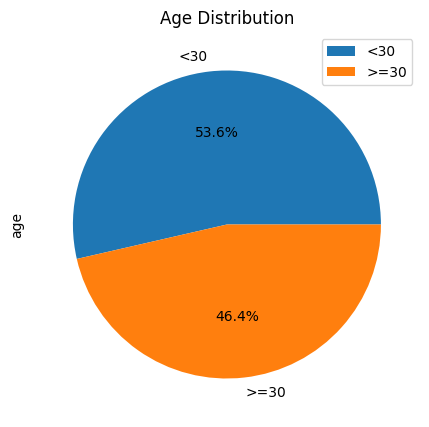

In [15]:
df['age'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5), title='Age Distribution', legend=True)


<AxesSubplot: title={'center': 'BMI Distribution'}, ylabel='bmi'>

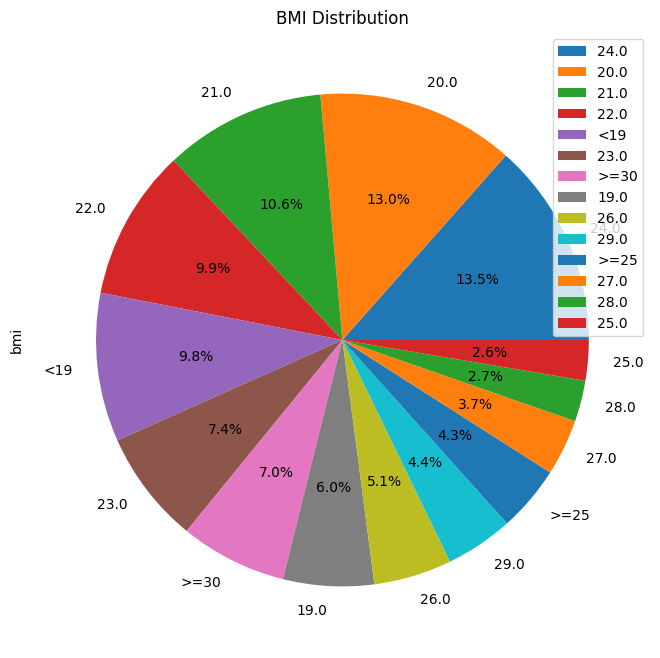

In [16]:
df['bmi'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='BMI Distribution', legend=True)

<AxesSubplot: >

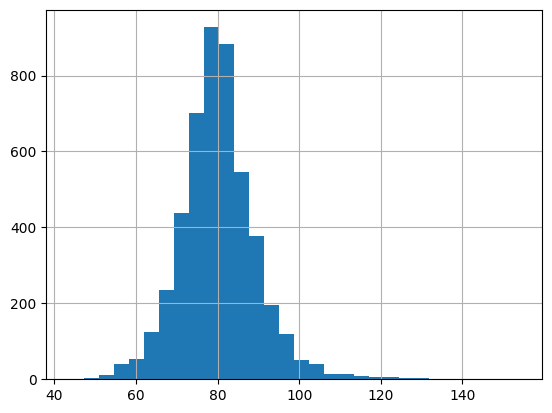

In [17]:
df['bpm'].hist(bins=30)

<AxesSubplot: >

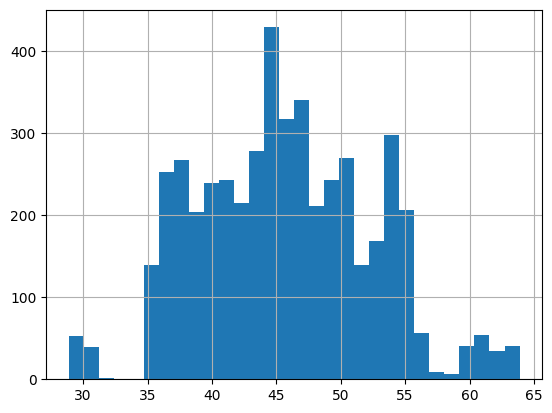

In [18]:
df['filteredDemographicVO2Max'].hist(bins=30)

<AxesSubplot: >

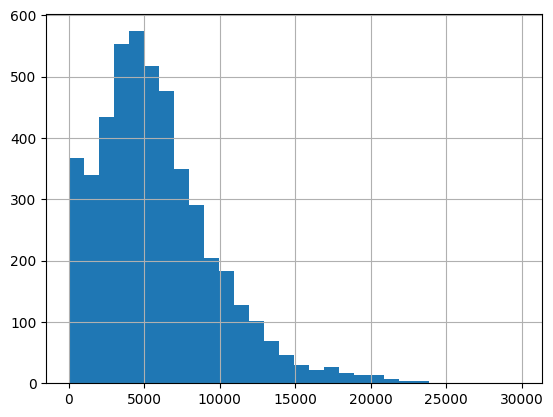

In [19]:
df['distance'].hist(bins=30)

<AxesSubplot: >

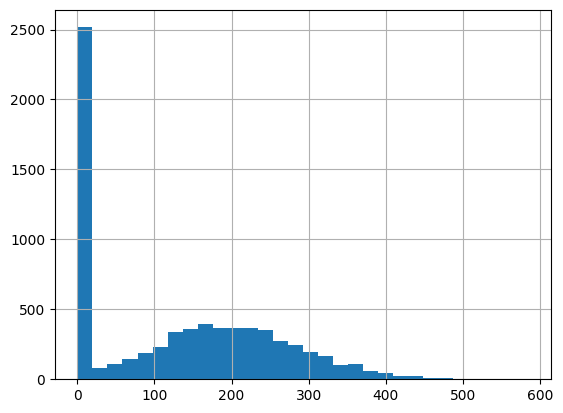

In [20]:
df['lightly_active_minutes'].hist(bins=30)

<AxesSubplot: >

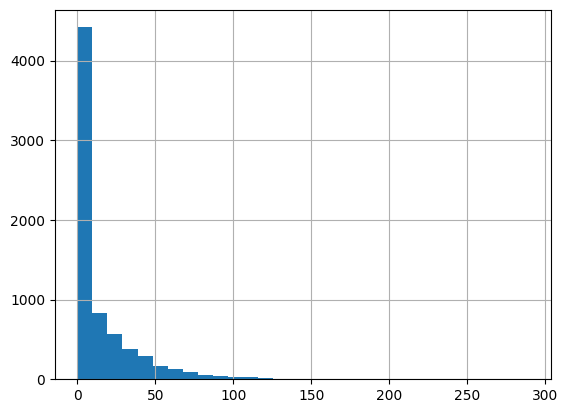

In [21]:
df['moderately_active_minutes'].hist(bins=30)

<AxesSubplot: >

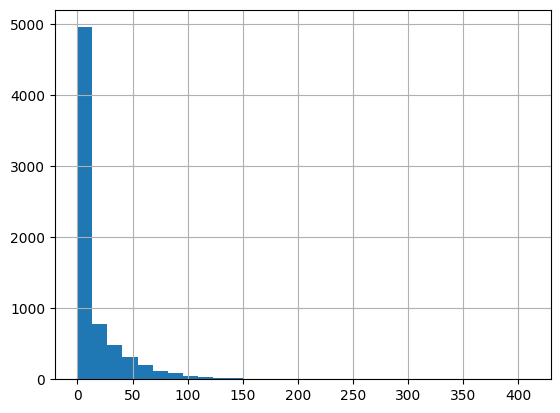

In [22]:
df['very_active_minutes'].hist(bins=30)

<AxesSubplot: >

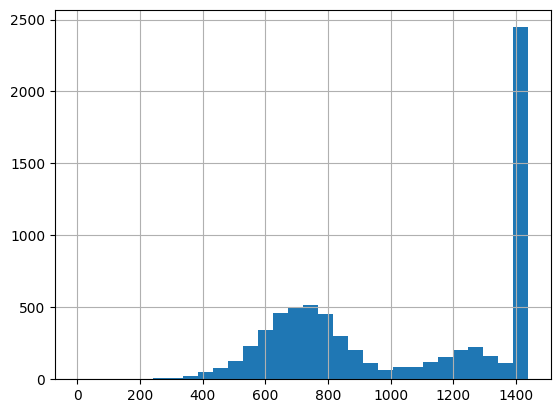

In [23]:
df['sedentary_minutes'].hist(bins=30)

<AxesSubplot: title={'center': 'Mindfulness Session Distribution'}, ylabel='mindfulness_session'>

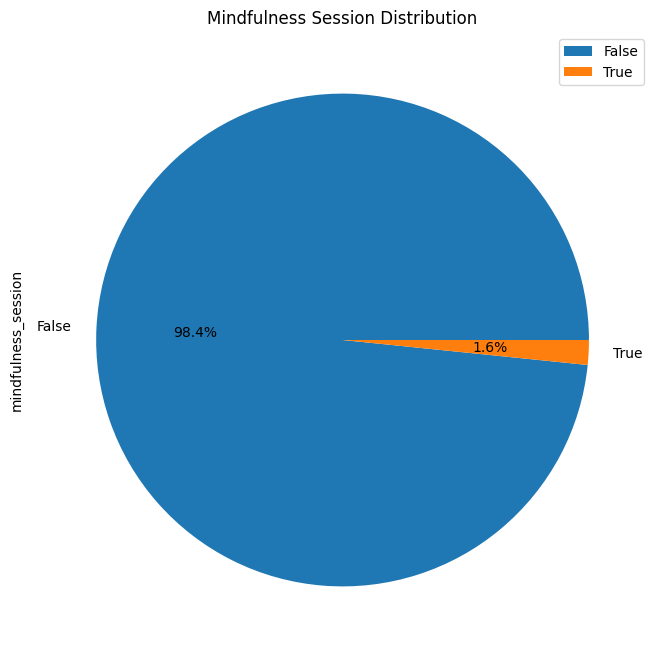

In [24]:
df['mindfulness_session'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Mindfulness Session Distribution', legend=True)

<AxesSubplot: >

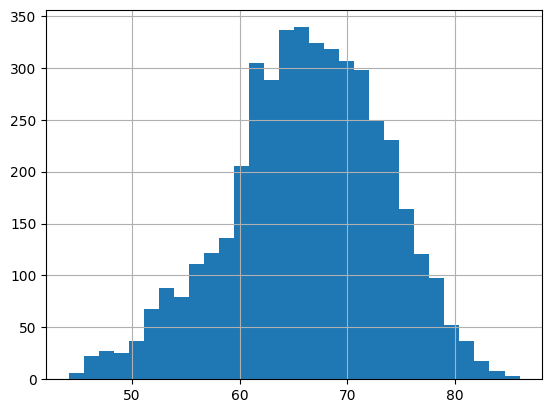

In [25]:
df['resting_hr'].hist(bins=30)

<AxesSubplot: >

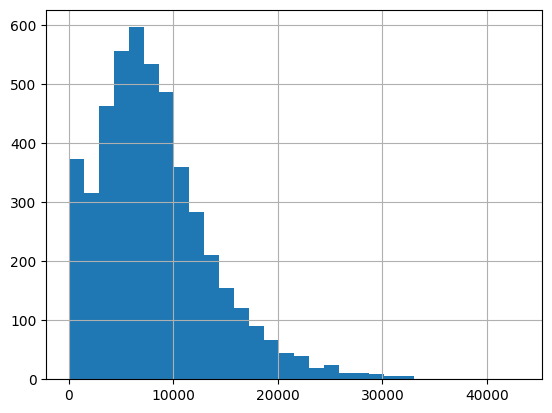

In [26]:
df['steps'].hist(bins=30)

We have different data with different distribution. Therefore, median is the best choice to be filled in missing value.

In [27]:
df.isna().sum()

id                                 0
date                               0
calories                         750
filteredDemographicVO2Max       2617
distance                        2633
bpm                             2606
lightly_active_minutes           327
moderately_active_minutes        327
very_active_minutes              327
sedentary_minutes                327
mindfulness_session              299
resting_hr                      2988
steps                           2633
minutes_in_default_zone_1       2602
minutes_below_default_zone_1    2602
minutes_in_default_zone_2       2602
minutes_in_default_zone_3       2602
age                              614
gender                           370
bmi                              614
dtype: int64

In [28]:
# minutes in intensity zone can be replicated by lightly, moderately, very active minutes
df.drop(['minutes_in_default_zone_1', 'minutes_below_default_zone_1', 'minutes_in_default_zone_2', 'minutes_in_default_zone_3'], axis=1, inplace=True)

In [29]:
df.isna().sum()

id                              0
date                            0
calories                      750
filteredDemographicVO2Max    2617
distance                     2633
bpm                          2606
lightly_active_minutes        327
moderately_active_minutes     327
very_active_minutes           327
sedentary_minutes             327
mindfulness_session           299
resting_hr                   2988
steps                        2633
age                           614
gender                        370
bmi                           614
dtype: int64

In [30]:
df['calories'].fillna(df['calories'].median(), inplace=True)
df['lightly_active_minutes'].fillna(df['lightly_active_minutes'].median(), inplace=True)
df['moderately_active_minutes'].fillna(df['moderately_active_minutes'].median(), inplace=True)
df['very_active_minutes'].fillna(df['very_active_minutes'].median(), inplace=True)
df['sedentary_minutes'].fillna(df['sedentary_minutes'].median(), inplace=True)
df['mindfulness_session'].fillna(df['mindfulness_session'].median(), inplace=True)
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3825 entries, 0 to 7383
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3825 non-null   object 
 1   date                       3825 non-null   object 
 2   calories                   3825 non-null   float64
 3   filteredDemographicVO2Max  3825 non-null   float64
 4   distance                   3825 non-null   float64
 5   bpm                        3825 non-null   float64
 6   lightly_active_minutes     3825 non-null   float64
 7   moderately_active_minutes  3825 non-null   float64
 8   very_active_minutes        3825 non-null   float64
 9   sedentary_minutes          3825 non-null   float64
 10  mindfulness_session        3825 non-null   object 
 11  resting_hr                 3825 non-null   float64
 12  steps                      3825 non-null   float64
 13  age                        3825 non-null   objec

In [32]:
# drop missing categorical data
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [33]:
df

id        date  calories  \
0     621e2e8e67b776a24055b564  2021-05-24   2351.59   
1     621e2e8e67b776a24055b564  2021-05-25   2332.08   
2     621e2e8e67b776a24055b564  2021-05-26   2262.30   
3     621e2e8e67b776a24055b564  2021-05-27   2325.10   
4     621e2e8e67b776a24055b564  2021-05-28   2586.76   
...                        ...         ...       ...   
3820  621e375b67b776a240290cdc  2021-07-28   2316.19   
3821  621e375b67b776a240290cdc  2021-07-29   2209.04   
3822  621e375b67b776a240290cdc  2021-07-30   2113.11   
3823  621e375b67b776a240290cdc  2021-07-31   2350.74   
3824  621e375b67b776a240290cdc  2021-08-01   1639.79   

      filteredDemographicVO2Max  distance        bpm  lightly_active_minutes  \
0                      62.79210    6517.5  71.701565                   149.0   
1                      62.67912    7178.6  70.579300                   132.0   
2                      62.57307    6090.9  71.842573                   112.0   
3                      62.47493    6653.1  71.725477                   133.0   
4                      62.41166    9557.9  74.401028                   136.0   
...                         ...       ...        ...                     ...   
3820                   36.41987    9687.9  97.196043                   241.0   
3821                   36.43511   11254.1  78.874591                   273.0   
3822                   36.45075    5729.7  96.181790                   255.0   
3823                   36.44707   11395.2  88.150005                   319.0   
3824                   36.42401    2461.3  90.028750                   156.0   

      moderately_active_minutes  very_active_minutes  sedentary_minutes  \
0                          24.0                 33.0              713.0   
1                          25.0                 31.0              704.0   
2                          27.0                 31.0              710.0   
3                          21.0                 37.0              622.0   
4                          42.0                 54.0              647.0   
...                         ...                  ...                ...   
3820                       47.0                 54.0             1098.0   
3821                       49.0                 26.0              556.0   
3822                       40.0                 29.0             1116.0   
3823                       64.0                 23.0              906.0   
3824                        0.0                  0.0             1284.0   

     mindfulness_session  resting_hr    steps  age  gender   bmi  
0                  False   62.073070   8833.0  <30    MALE   <19  
1                  False   62.121476   9727.0  <30    MALE   <19  
2                  False   62.263999   8253.0  <30    MALE   <19  
3                  False   62.368900   9015.0  <30    MALE   <19  
4                  False   61.965409  12949.0  <30    MALE   <19  
...                  ...         ...      ...  ...     ...   ...  
3820               False   73.767169  15097.0  <30  FEMALE  23.0  
3821               False   73.422378  17051.0  <30  FEMALE  23.0  
3822               False   73.380007   9289.0  <30  FEMALE  23.0  
3823               False   73.708629  17269.0  <30  FEMALE  23.0  
3824               False   74.082370   3692.0  <30  FEMALE  23.0  

[3825 rows x 16 columns]

# Data Preprocessing

In [34]:
df.isna().sum()

id                           0
date                         0
calories                     0
filteredDemographicVO2Max    0
distance                     0
bpm                          0
lightly_active_minutes       0
moderately_active_minutes    0
very_active_minutes          0
sedentary_minutes            0
mindfulness_session          0
resting_hr                   0
steps                        0
age                          0
gender                       0
bmi                          0
dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

target = ['mindfulness_session','gender']

cat_df = df[target]
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(cat_df)
encoded_features = encoder.transform(cat_df)

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())
df = pd.concat([df.drop(target, axis=1), encoded_df], axis=1)

df

id        date  calories  \
0     621e2e8e67b776a24055b564  2021-05-24   2351.59   
1     621e2e8e67b776a24055b564  2021-05-25   2332.08   
2     621e2e8e67b776a24055b564  2021-05-26   2262.30   
3     621e2e8e67b776a24055b564  2021-05-27   2325.10   
4     621e2e8e67b776a24055b564  2021-05-28   2586.76   
...                        ...         ...       ...   
3820  621e375b67b776a240290cdc  2021-07-28   2316.19   
3821  621e375b67b776a240290cdc  2021-07-29   2209.04   
3822  621e375b67b776a240290cdc  2021-07-30   2113.11   
3823  621e375b67b776a240290cdc  2021-07-31   2350.74   
3824  621e375b67b776a240290cdc  2021-08-01   1639.79   

      filteredDemographicVO2Max  distance        bpm  lightly_active_minutes  \
0                      62.79210    6517.5  71.701565                   149.0   
1                      62.67912    7178.6  70.579300                   132.0   
2                      62.57307    6090.9  71.842573                   112.0   
3                      62.47493    6653.1  71.725477                   133.0   
4                      62.41166    9557.9  74.401028                   136.0   
...                         ...       ...        ...                     ...   
3820                   36.41987    9687.9  97.196043                   241.0   
3821                   36.43511   11254.1  78.874591                   273.0   
3822                   36.45075    5729.7  96.181790                   255.0   
3823                   36.44707   11395.2  88.150005                   319.0   
3824                   36.42401    2461.3  90.028750                   156.0   

      moderately_active_minutes  very_active_minutes  sedentary_minutes  \
0                          24.0                 33.0              713.0   
1                          25.0                 31.0              704.0   
2                          27.0                 31.0              710.0   
3                          21.0                 37.0              622.0   
4                          42.0                 54.0              647.0   
...                         ...                  ...                ...   
3820                       47.0                 54.0             1098.0   
3821                       49.0                 26.0              556.0   
3822                       40.0                 29.0             1116.0   
3823                       64.0                 23.0              906.0   
3824                        0.0                  0.0             1284.0   

      resting_hr    steps  age   bmi  mindfulness_session_False  \
0      62.073070   8833.0  <30   <19                        1.0   
1      62.121476   9727.0  <30   <19                        1.0   
2      62.263999   8253.0  <30   <19                        1.0   
3      62.368900   9015.0  <30   <19                        1.0   
4      61.965409  12949.0  <30   <19                        1.0   
...          ...      ...  ...   ...                        ...   
3820   73.767169  15097.0  <30  23.0                        1.0   
3821   73.422378  17051.0  <30  23.0                        1.0   
3822   73.380007   9289.0  <30  23.0                        1.0   
3823   73.708629  17269.0  <30  23.0                        1.0   
3824   74.082370   3692.0  <30  23.0                        1.0   

      mindfulness_session_True  gender_FEMALE  gender_MALE  
0                          0.0            0.0          1.0  
1                          0.0            0.0          1.0  
2                          0.0            0.0          1.0  
3                          0.0            0.0          1.0  
4                          0.0            0.0          1.0  
...                        ...            ...          ...  
3820                       0.0            1.0          0.0  
3821                       0.0            1.0          0.0  
3822                       0.0            1.0          0.0  
3823                       0.0            1.0          0.0  
3824             

In [36]:
# use ordinal scaler for BMI column
from sklearn.preprocessing import OrdinalEncoder

bmi_df = df[['bmi']]
age_df = df[['age']]

df.drop(['bmi', 'age'], axis=1, inplace=True)
encoder = OrdinalEncoder()
encoded_bmi = encoder.fit_transform(bmi_df)

df['bmi'] = encoded_bmi

encoded_age = encoder.fit_transform(age_df)
df['age'] = encoded_age



In [37]:
numeric_features = ['calories', 'filteredDemographicVO2Max', 'distance', 'bpm', 'lightly_active_minutes', 'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes', 'resting_hr', 'steps']

array([[<AxesSubplot: title={'center': 'calories'}>,
        <AxesSubplot: title={'center': 'filteredDemographicVO2Max'}>,
        <AxesSubplot: title={'center': 'distance'}>],
       [<AxesSubplot: title={'center': 'bpm'}>,
        <AxesSubplot: title={'center': 'lightly_active_minutes'}>,
        <AxesSubplot: title={'center': 'moderately_active_minutes'}>],
       [<AxesSubplot: title={'center': 'very_active_minutes'}>,
        <AxesSubplot: title={'center': 'sedentary_minutes'}>,
        <AxesSubplot: title={'center': 'resting_hr'}>],
       [<AxesSubplot: title={'center': 'steps'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

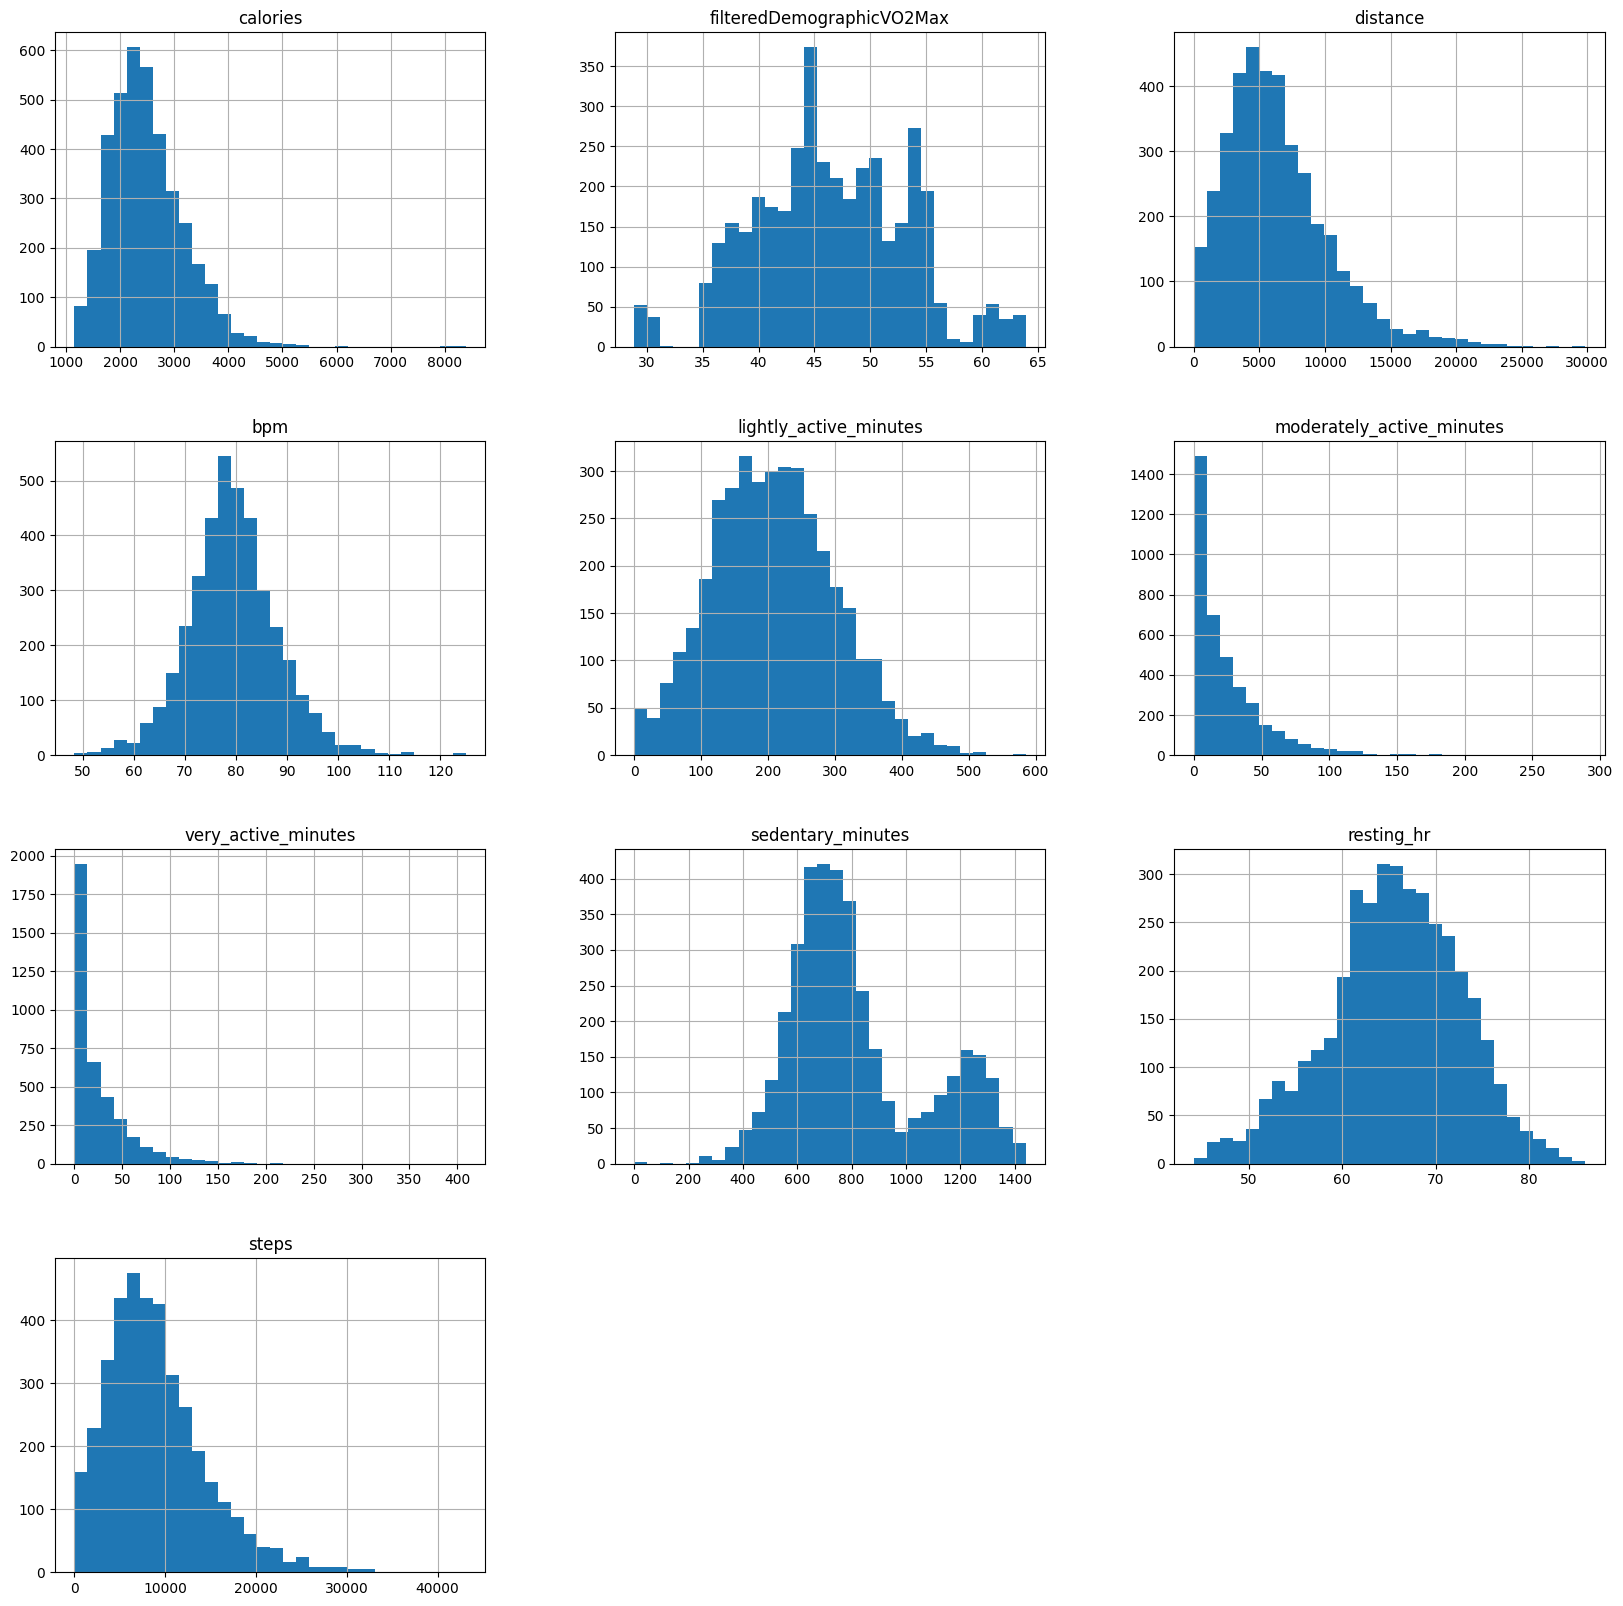

In [38]:
df[numeric_features].hist(figsize=(20, 20), bins=30)

/var/folders/pf/z8gx8qw104xby0jdggl6xdnc0000gn/T/ipykernel_26363/3025817826.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')


<AxesSubplot: >

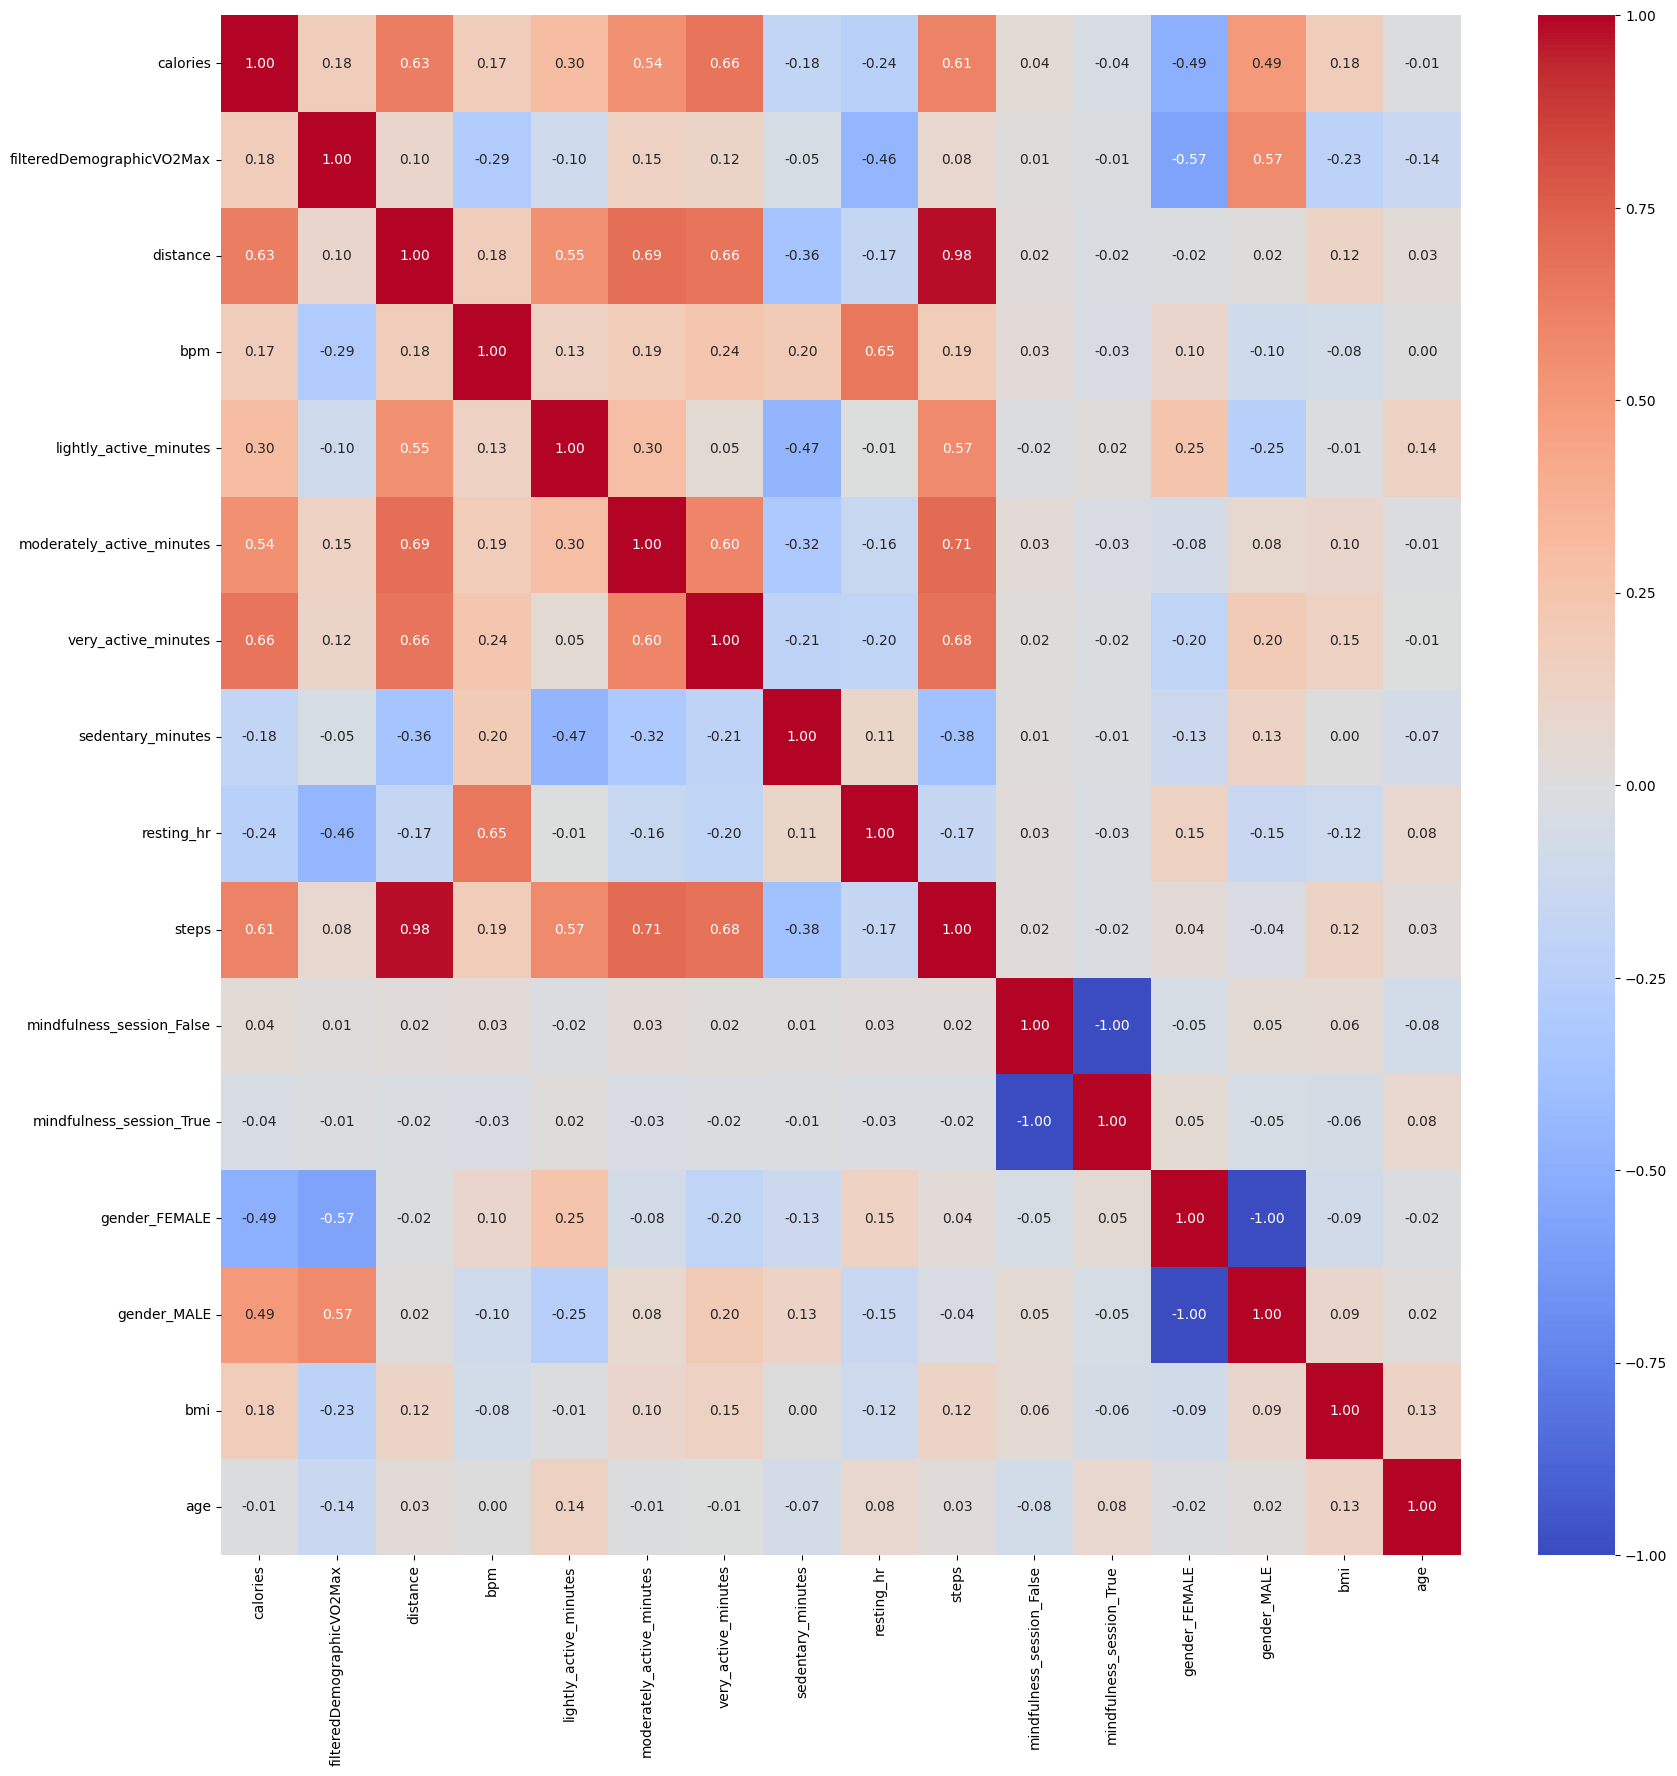

In [39]:
# plot heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

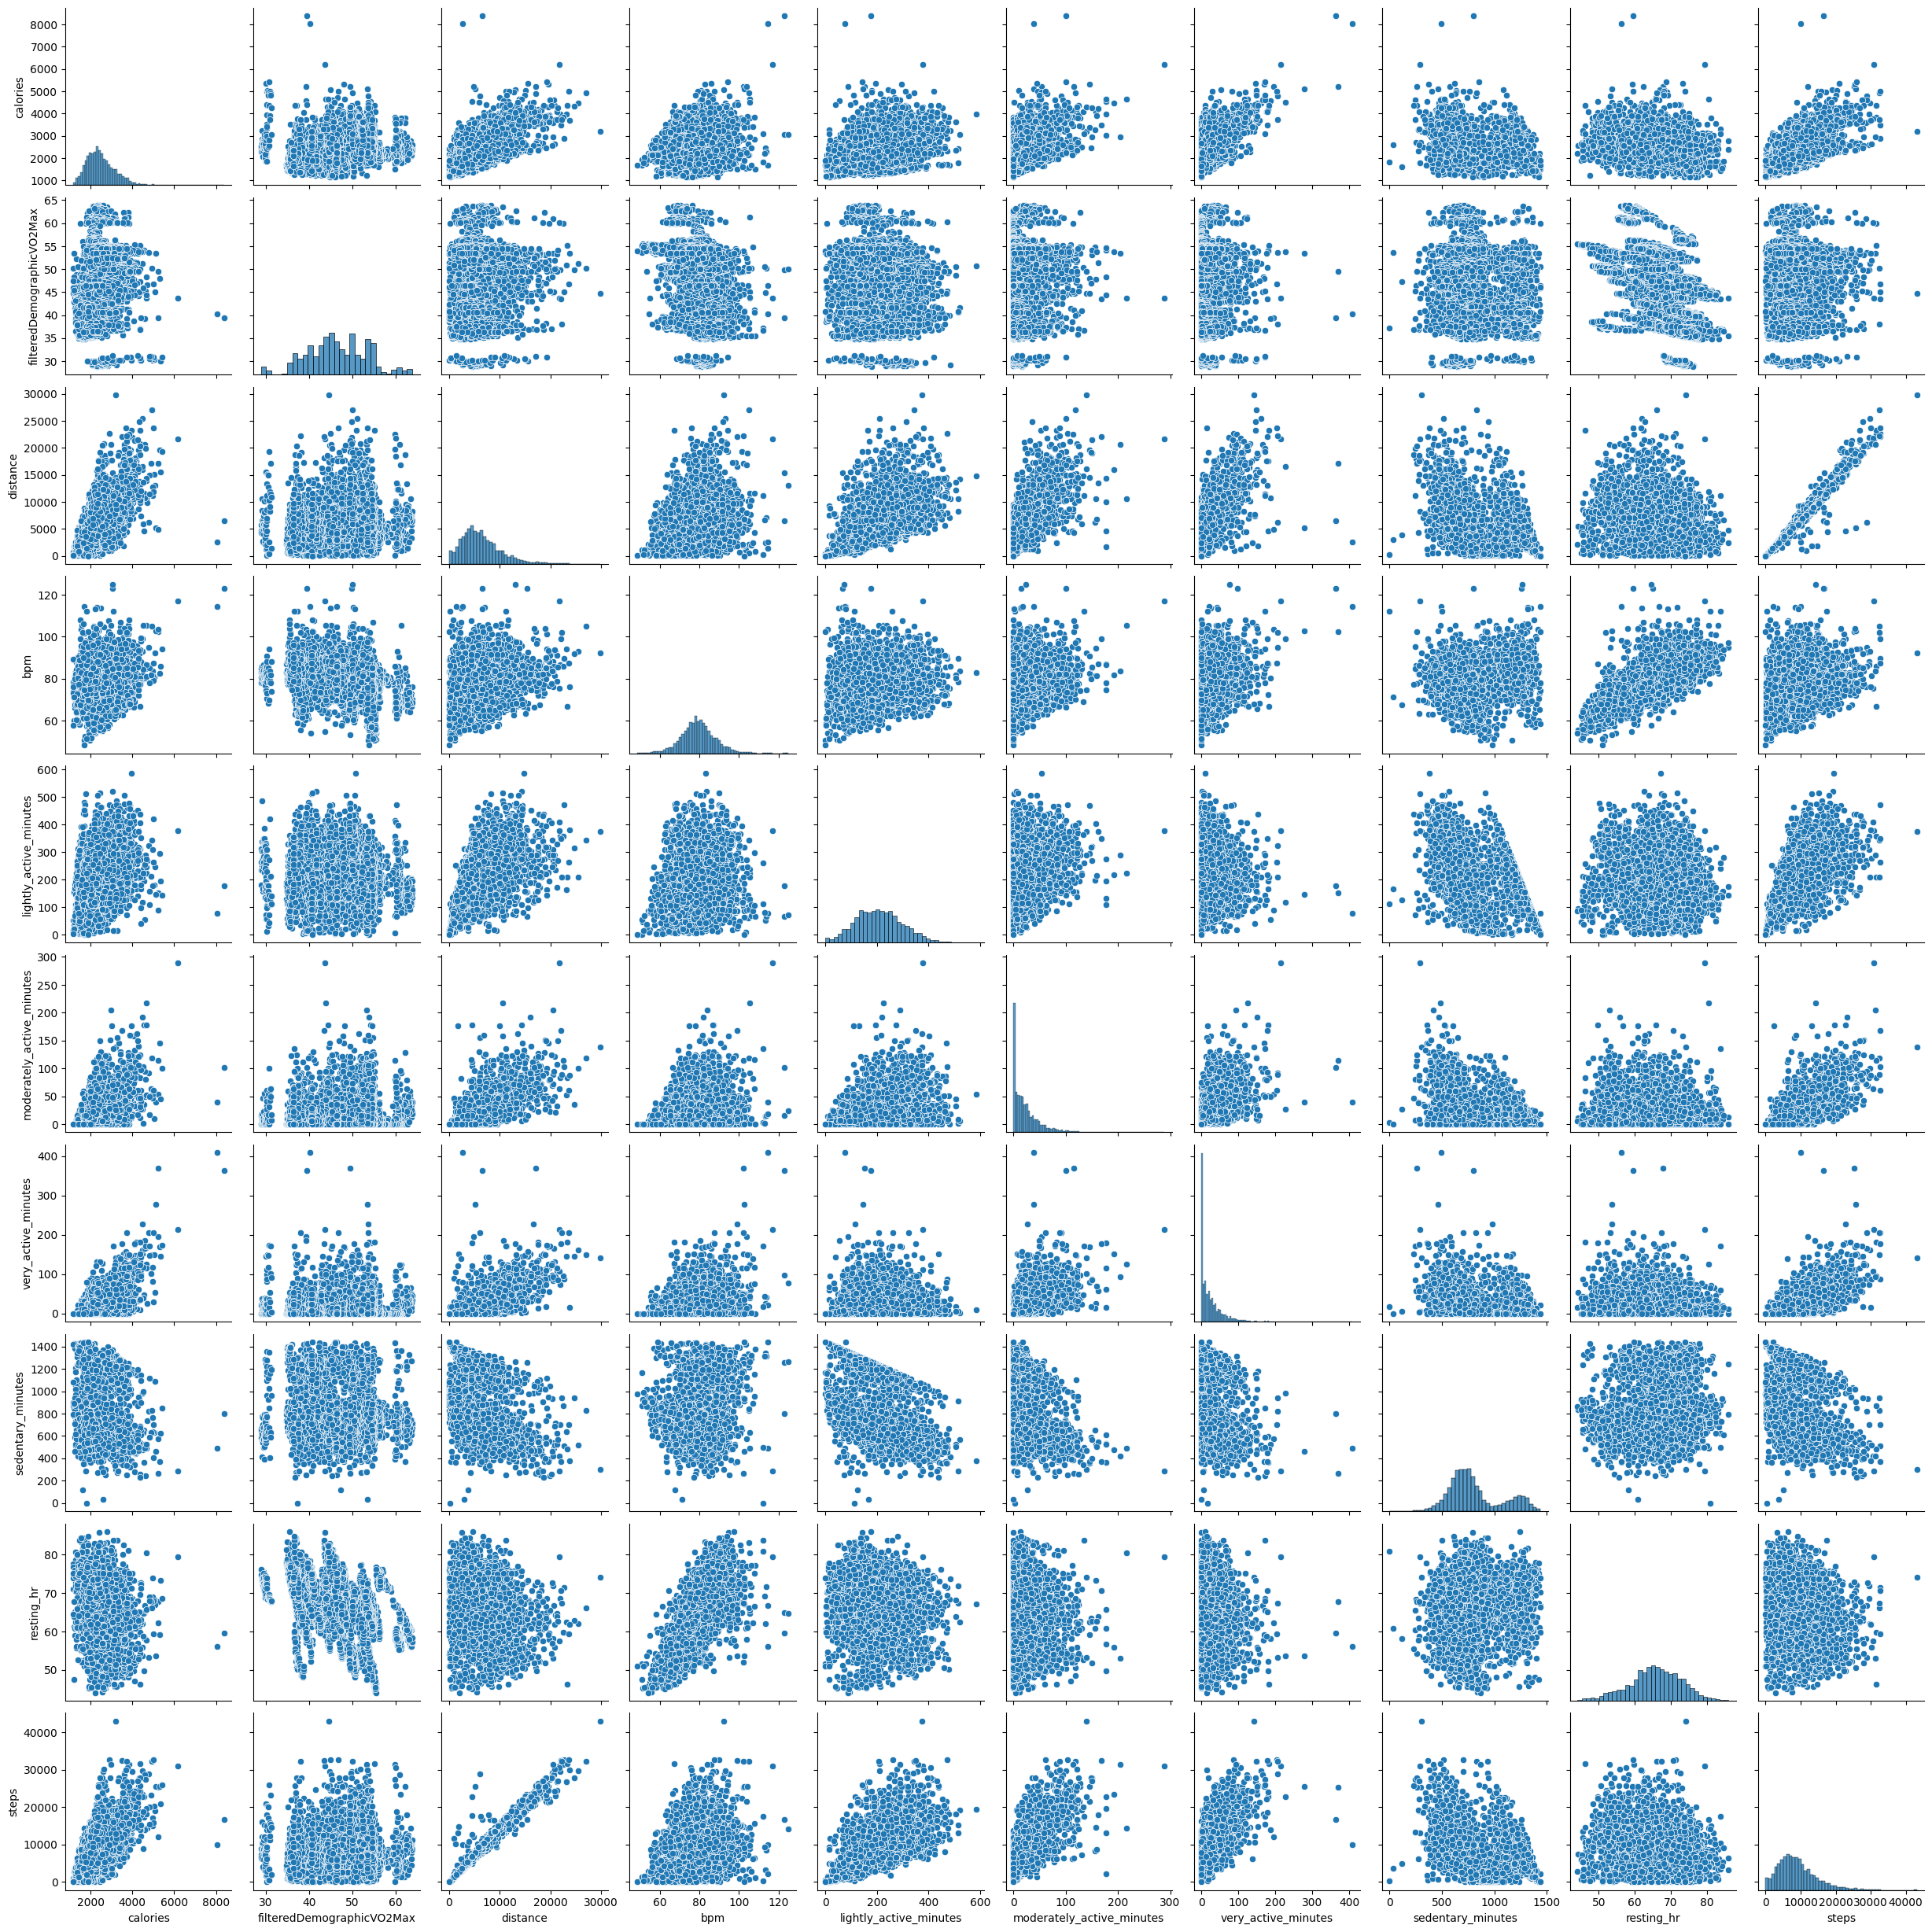

In [40]:
sns.pairplot(df[numeric_features])

In [41]:
df

id        date  calories  \
0     621e2e8e67b776a24055b564  2021-05-24   2351.59   
1     621e2e8e67b776a24055b564  2021-05-25   2332.08   
2     621e2e8e67b776a24055b564  2021-05-26   2262.30   
3     621e2e8e67b776a24055b564  2021-05-27   2325.10   
4     621e2e8e67b776a24055b564  2021-05-28   2586.76   
...                        ...         ...       ...   
3820  621e375b67b776a240290cdc  2021-07-28   2316.19   
3821  621e375b67b776a240290cdc  2021-07-29   2209.04   
3822  621e375b67b776a240290cdc  2021-07-30   2113.11   
3823  621e375b67b776a240290cdc  2021-07-31   2350.74   
3824  621e375b67b776a240290cdc  2021-08-01   1639.79   

      filteredDemographicVO2Max  distance        bpm  lightly_active_minutes  \
0                      62.79210    6517.5  71.701565                   149.0   
1                      62.67912    7178.6  70.579300                   132.0   
2                      62.57307    6090.9  71.842573                   112.0   
3                      62.47493    6653.1  71.725477                   133.0   
4                      62.41166    9557.9  74.401028                   136.0   
...                         ...       ...        ...                     ...   
3820                   36.41987    9687.9  97.196043                   241.0   
3821                   36.43511   11254.1  78.874591                   273.0   
3822                   36.45075    5729.7  96.181790                   255.0   
3823                   36.44707   11395.2  88.150005                   319.0   
3824                   36.42401    2461.3  90.028750                   156.0   

      moderately_active_minutes  very_active_minutes  sedentary_minutes  \
0                          24.0                 33.0              713.0   
1                          25.0                 31.0              704.0   
2                          27.0                 31.0              710.0   
3                          21.0                 37.0              622.0   
4                          42.0                 54.0              647.0   
...                         ...                  ...                ...   
3820                       47.0                 54.0             1098.0   
3821                       49.0                 26.0              556.0   
3822                       40.0                 29.0             1116.0   
3823                       64.0                 23.0              906.0   
3824                        0.0                  0.0             1284.0   

      resting_hr    steps  mindfulness_session_False  \
0      62.073070   8833.0                        1.0   
1      62.121476   9727.0                        1.0   
2      62.263999   8253.0                        1.0   
3      62.368900   9015.0                        1.0   
4      61.965409  12949.0                        1.0   
...          ...      ...                        ...   
3820   73.767169  15097.0                        1.0   
3821   73.422378  17051.0                        1.0   
3822   73.380007   9289.0                        1.0   
3823   73.708629  17269.0                        1.0   
3824   74.082370   3692.0                        1.0   

      mindfulness_session_True  gender_FEMALE  gender_MALE   bmi  age  
0                          0.0            0.0          1.0  11.0  0.0  
1                          0.0            0.0          1.0  11.0  0.0  
2                          0.0            0.0          1.0  11.0  0.0  
3                          0.0            0.0          1.0  11.0  0.0  
4                          0.0            0.0          1.0  11.0  0.0  
...                        ...            ...          ...   ...  ...  
3820                       0.0            1.0          0.0   4.0  0.0  
3821                       0.0            1.0          0.0   4.0  0.0  
3822                       0.0            1.0          0.0   4.0  0.0  
3823                       0.0            1.0          0.0   4.0  0.0  
3824                       0

In [42]:
# normalize data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_transformed = df.copy()
df_transformed.drop(['id', 'date'], axis=1, inplace=True)
df_transformed = scaler.fit_transform(df_transformed[numeric_features])
df_transformed = pd.DataFrame(df_transformed, columns=numeric_features)
df_transformed

calories  filteredDemographicVO2Max  distance       bpm  \
0     0.165276                   0.968873  0.218337  0.304428   
1     0.162577                   0.965645  0.240483  0.289774   
2     0.152927                   0.962616  0.204045  0.306269   
3     0.161612                   0.959812  0.222879  0.304740   
4     0.197801                   0.958005  0.320190  0.339677   
...        ...                        ...       ...       ...   
3820  0.160380                   0.215529  0.324545  0.637327   
3821  0.145561                   0.215964  0.377013  0.398091   
3822  0.132293                   0.216411  0.191945  0.624084   
3823  0.165158                   0.216306  0.381740  0.519207   
3824  0.066831                   0.215647  0.082454  0.543739   

      lightly_active_minutes  moderately_active_minutes  very_active_minutes  \
0                   0.254701                   0.083045             0.080685   
1                   0.225641                   0.086505             0.075795   
2                   0.191453                   0.093426             0.075795   
3                   0.227350                   0.072664             0.090465   
4                   0.232479                   0.145329             0.132029   
...                      ...                        ...                  ...   
3820                0.411966                   0.162630             0.132029   
3821                0.466667                   0.169550             0.063570   
3822                0.435897                   0.138408             0.070905   
3823                0.545299                   0.221453             0.056235   
3824                0.266667                   0.000000             0.000000   

      sedentary_minutes  resting_hr     steps  
0              0.495139    0.428640  0.204885  
1              0.488889    0.429796  0.225622  
2              0.493056    0.433199  0.191432  
3              0.431944    0.435704  0.209107  
4              0.449306    0.426069  0.300357  
...                 ...         ...       ...  
3820           0.762500    0.707888  0.350181  
3821           0.386111    0.699654  0.395505  
3822           0.775000    0.698643  0.215462  
3823           0.629167    0.706490  0.400561  
3824           0.891667    0.715415  0.085637  

[3825 rows x 10 columns]

In [43]:
df[numeric_features] = df_transformed

In [44]:
# drop features with high intercollinearity

df.drop(['very_active_minutes', 'moderately_active_minutes', 'distance'], axis=1, inplace=True)

In [45]:
numeric_features = ['calories', 'filteredDemographicVO2Max', 'bpm', 'lightly_active_minutes', 'sedentary_minutes', 'resting_hr', 'steps']

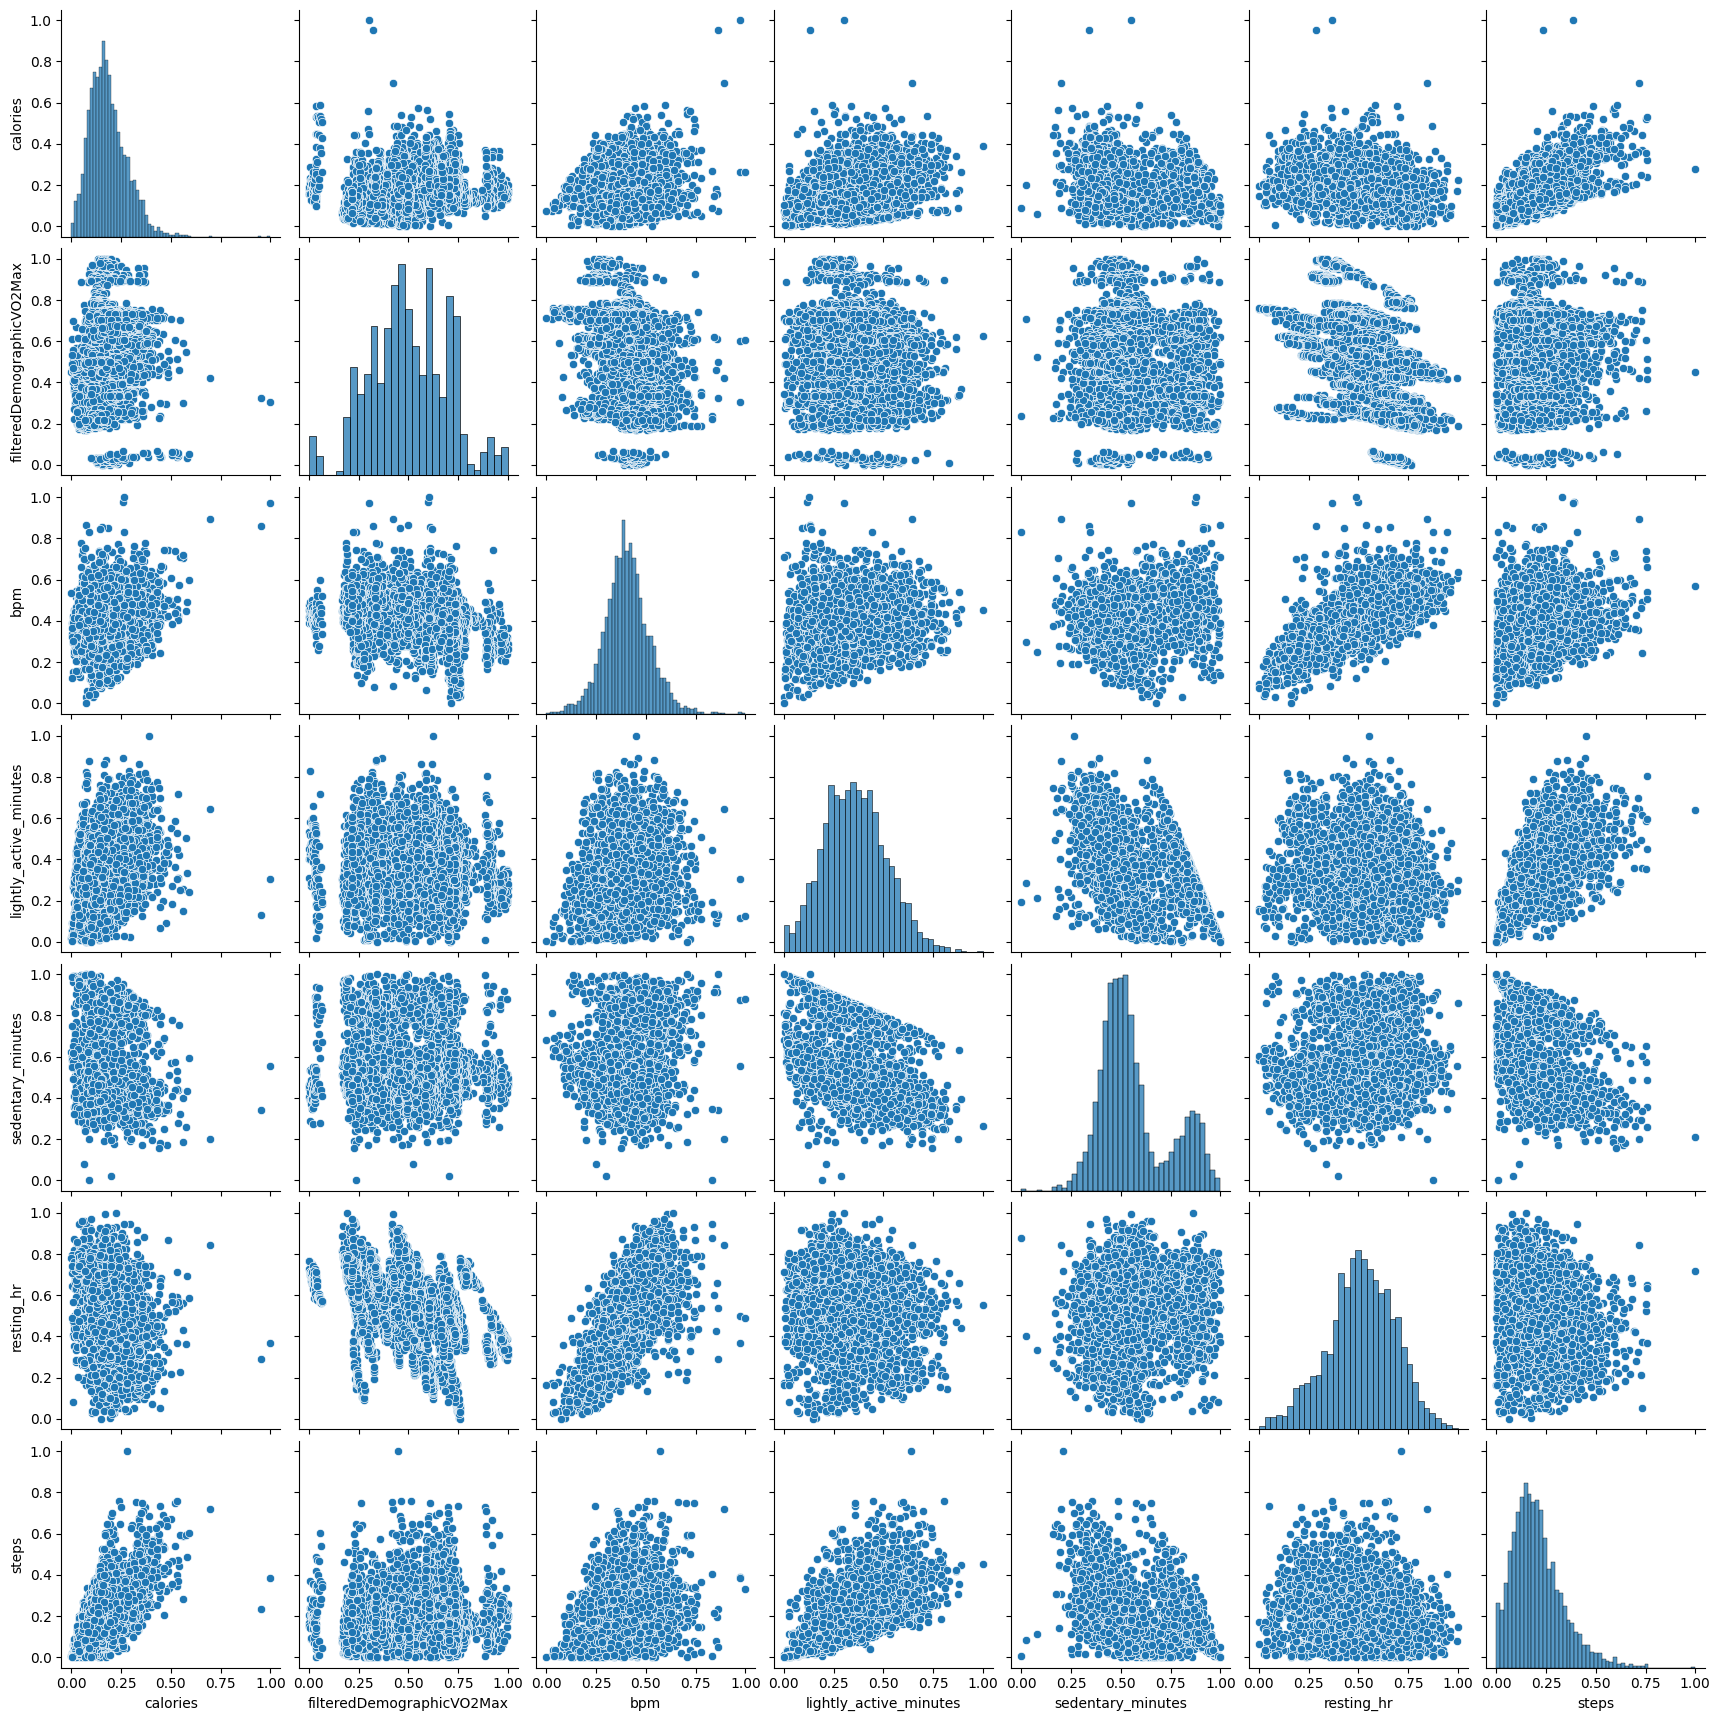

In [46]:
sns.pairplot(df[numeric_features])

In [47]:
df.columns

Index(['id', 'date', 'calories', 'filteredDemographicVO2Max', 'bpm',
       'lightly_active_minutes', 'sedentary_minutes', 'resting_hr', 'steps',
       'mindfulness_session_False', 'mindfulness_session_True',
       'gender_FEMALE', 'gender_MALE', 'bmi', 'age'],
      dtype='object')

<AxesSubplot: >

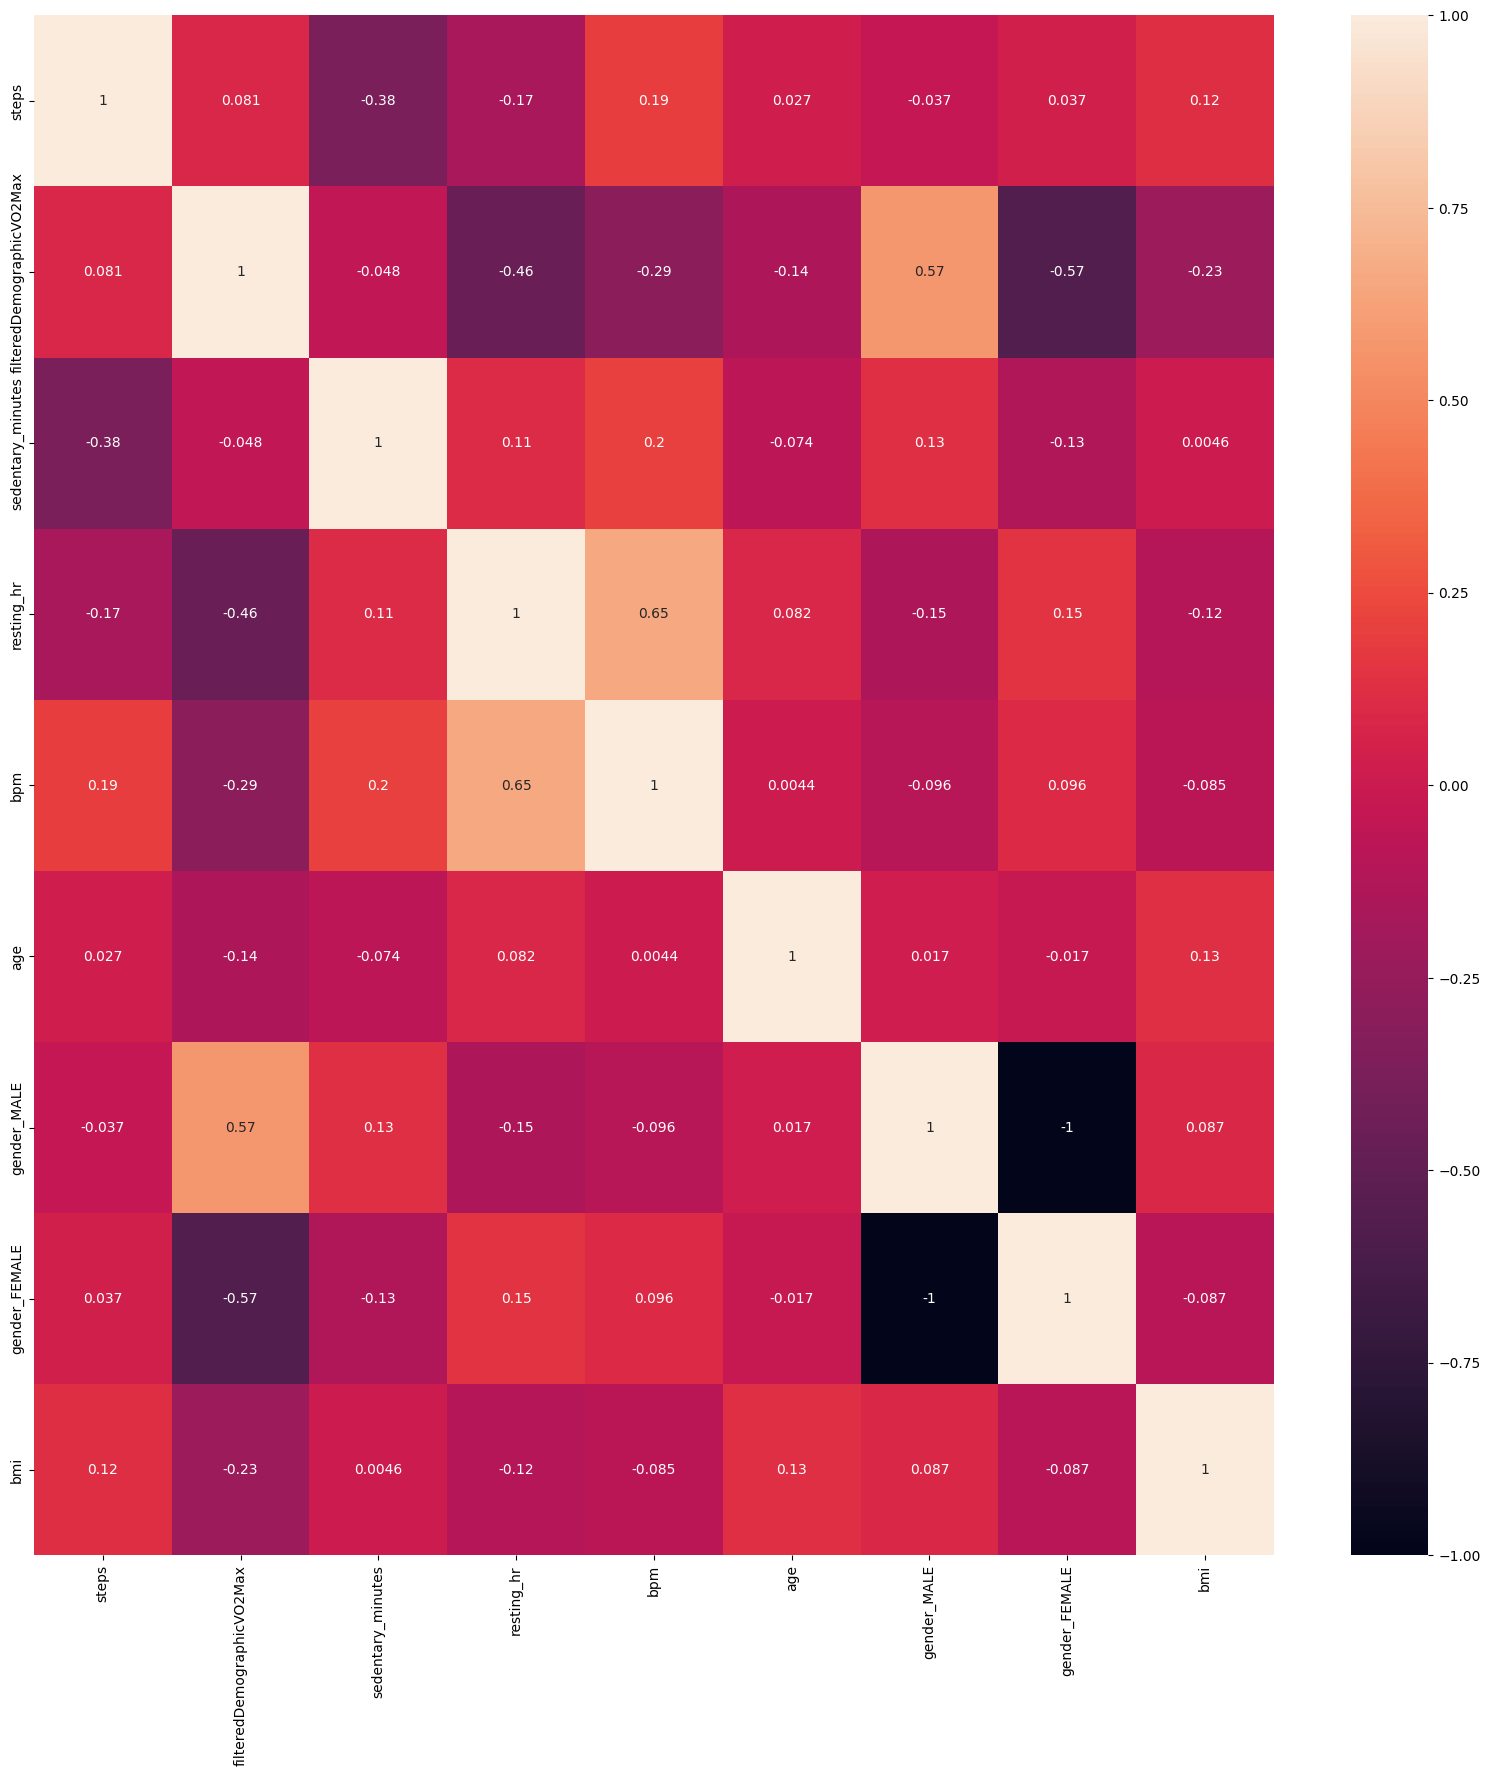

In [48]:
selected_features = ['steps', 'filteredDemographicVO2Max', 'sedentary_minutes', 'resting_hr', 'bpm', 'age', 'gender_MALE', 'gender_FEMALE', 'bmi']
plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True)

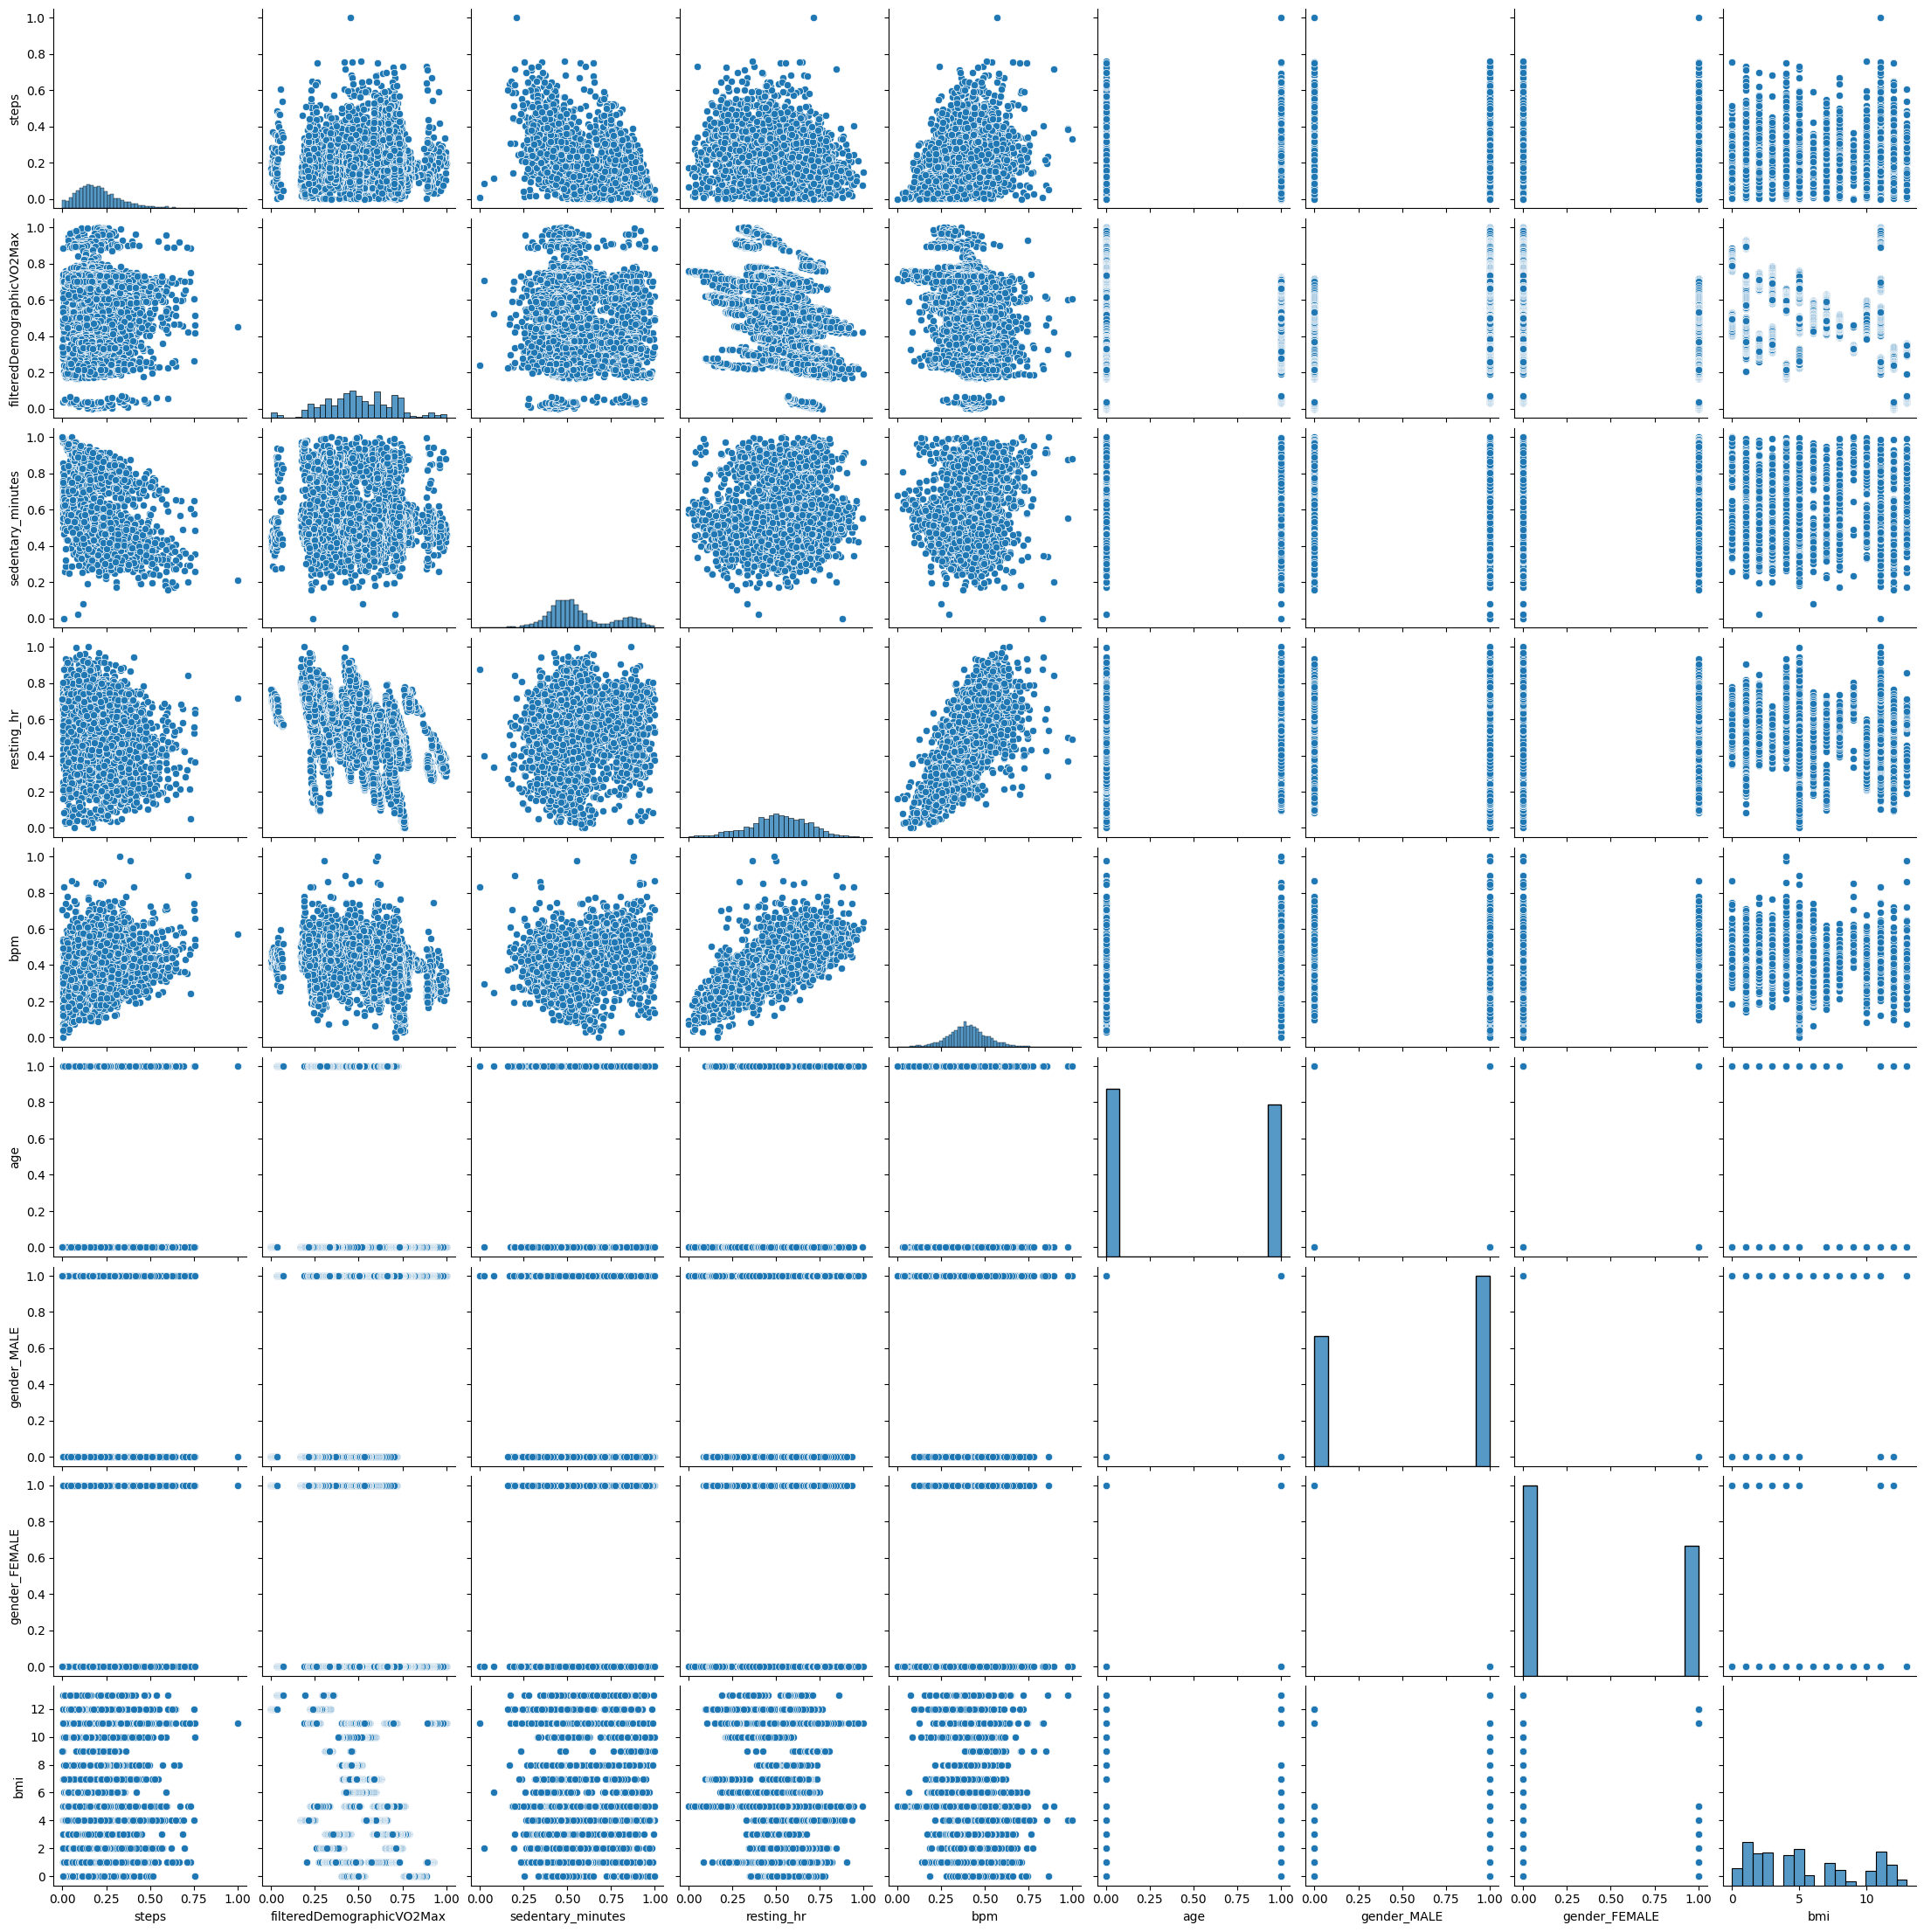

In [49]:
sns.pairplot(df[selected_features])

In [50]:
training_features = selected_features

In [51]:
df[df['calories'] == 0]

id        date  calories  \
3061  621e34ca67b776a240be3b69  2021-06-12       0.0   

      filteredDemographicVO2Max       bpm  lightly_active_minutes  \
3061                   0.451673  0.533255                0.018803   

      sedentary_minutes  resting_hr     steps  mindfulness_session_False  \
3061           0.623611    0.781477  0.004384                        1.0   

      mindfulness_session_True  gender_FEMALE  gender_MALE   bmi  age  
3061                       0.0            1.0          0.0  11.0  1.0

In [52]:
df = df[df['calories'] != 0]

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[training_features], df['calories'], test_size=0.20, random_state=20, shuffle=True)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

linear_regression = LinearRegression().fit(x_train, y_train)
y_pred_train = linear_regression.predict(x_train)
y_pred_test = linear_regression.predict(x_test)

print(f'Linear Regression Coef: {linear_regression.coef_}')
print(f'Linear Regression Intercept: {linear_regression.intercept_}')

print('Train r2 score = ', r2_score(y_train,y_pred_train))
print('Train MSE = ', mean_squared_error(y_train,y_pred_train))
print('Train MAE = ', mean_absolute_error(y_train,y_pred_train))
print('Train MAPE = ', mean_absolute_percentage_error(y_train,y_pred_train))

print('Test r2 score = ', r2_score(y_test,y_pred_test))
print('Test MSE = ', mean_squared_error(y_test,y_pred_test))
print('Test MAE = ', mean_absolute_error(y_test,y_pred_test))
print('Test MAPE = ', mean_absolute_percentage_error(y_test,y_pred_test))


Linear Regression Coef: [ 3.56838847e-01 -2.08795984e-01 -7.52331740e-02 -2.49344981e-01
  2.77896728e-01 -1.12823066e-02 -7.58126038e+10 -7.58126038e+10
 -1.26597196e-03]
Linear Regression Intercept: 75812603794.62648
Train r2 score =  0.7776271554460287
Train MSE =  0.0018998023346697426
Train MAE =  0.02784244847739734
Train MAPE =  0.2907671080559988
Test r2 score =  0.7543060012597004
Test MSE =  0.002410702216098268
Test MAE =  0.03172888933799237
Test MAPE =  0.36641410230568133


Text(0.5, 1.0, 'Decision Tree Regression')

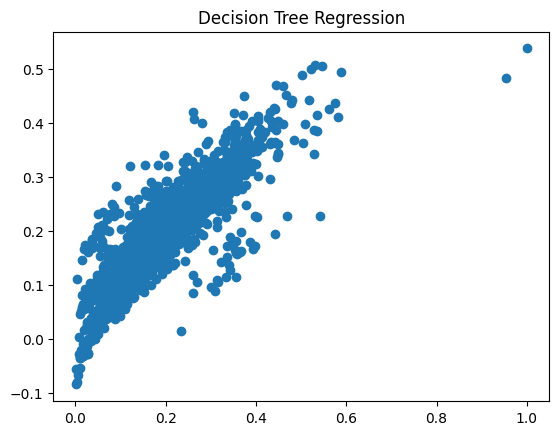

In [55]:
plt.scatter(y_train, y_pred_train)
plt.title('Decision Tree Regression')

Text(0.5, 1.0, 'Linear Regression')

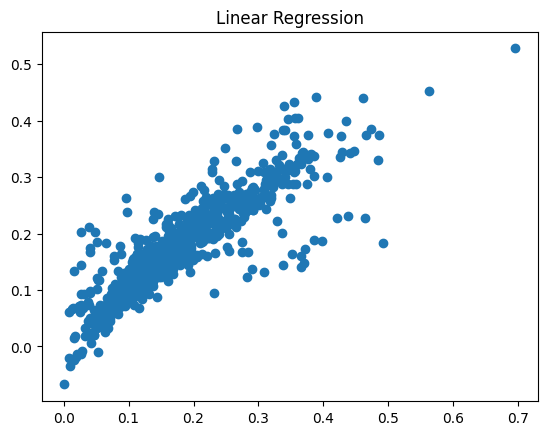

In [56]:
plt.scatter(y_test, y_pred_test)
plt.title('Linear Regression')

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=8).fit(x_train, y_train)
y_pred_train = dt_reg.predict(x_train)
y_pred_test = dt_reg.predict(x_test)

print('Train r2 score = ', r2_score(y_train,y_pred_train))
print('Train MSE = ', mean_squared_error(y_train,y_pred_train))
print('Train MAE = ', mean_absolute_error(y_train,y_pred_train))
print('Train MAPE = ', mean_absolute_percentage_error(y_train,y_pred_train))

print('Test r2 score = ', r2_score(y_test,y_pred_test))
print('Test MSE = ', mean_squared_error(y_test,y_pred_test))
print('Test MAE = ', mean_absolute_error(y_test,y_pred_test))
print('Test MAPE = ', mean_absolute_percentage_error(y_test,y_pred_test))

Train r2 score =  0.9173450779150654
Train MSE =  0.0007061474356901199
Train MAE =  0.018740225954775837
Train MAPE =  0.13690812028052143
Test r2 score =  0.817566794706678
Test MSE =  0.0017899994893867354
Test MAE =  0.027615596632049464
Test MAPE =  0.19467393230920485


Text(0.5, 1.0, 'Decision Tree Regression')

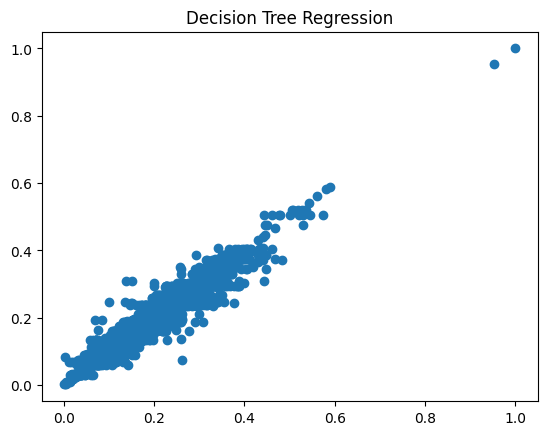

In [58]:
plt.scatter(y_train, y_pred_train)
plt.title('Decision Tree Regression')

Text(0.5, 1.0, 'Decision Tree Regression')

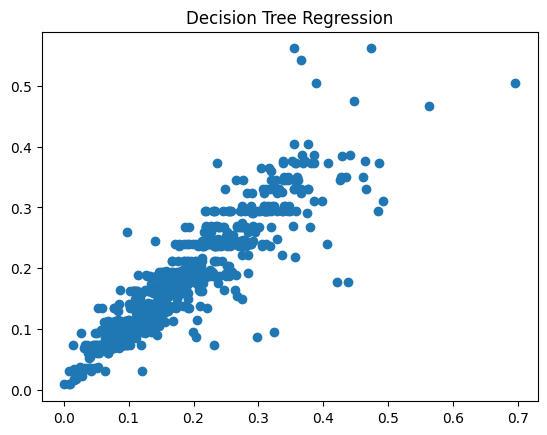

In [59]:
plt.scatter(y_test, y_pred_test)
plt.title('Decision Tree Regression')

In [60]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(x_train, y_train)
y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)

print('Train r2 score = ', r2_score(y_train,y_pred_train))
print('Train MSE = ', mean_squared_error(y_train,y_pred_train))
print('Train MAE = ', mean_absolute_error(y_train,y_pred_train))
print('Train MAPE = ', mean_absolute_percentage_error(y_train,y_pred_train))

print('Test r2 score = ', r2_score(y_test,y_pred_test))
print('Test MSE = ', mean_squared_error(y_test,y_pred_test))
print('Test MAE = ', mean_absolute_error(y_test,y_pred_test))
print('Test MAPE = ', mean_absolute_percentage_error(y_test,y_pred_test))

Train r2 score =  0.9819149408838814
Train MSE =  0.0001545064443473604
Train MAE =  0.007050774906443363
Train MAPE =  0.05319001649116505
Test r2 score =  0.8934469331489096
Test MSE =  0.0010454781789827183
Test MAE =  0.020349094306351272
Test MAPE =  0.1474899183780193


In [61]:
y_train

3275    0.157398
1128    0.197797
2699    0.288273
1557    0.088448
524     0.054504
          ...   
2972    0.100418
3296    0.224445
271     0.108701
2522    0.218797
3428    0.194715
Name: calories, Length: 3059, dtype: float64

<AxesSubplot: >

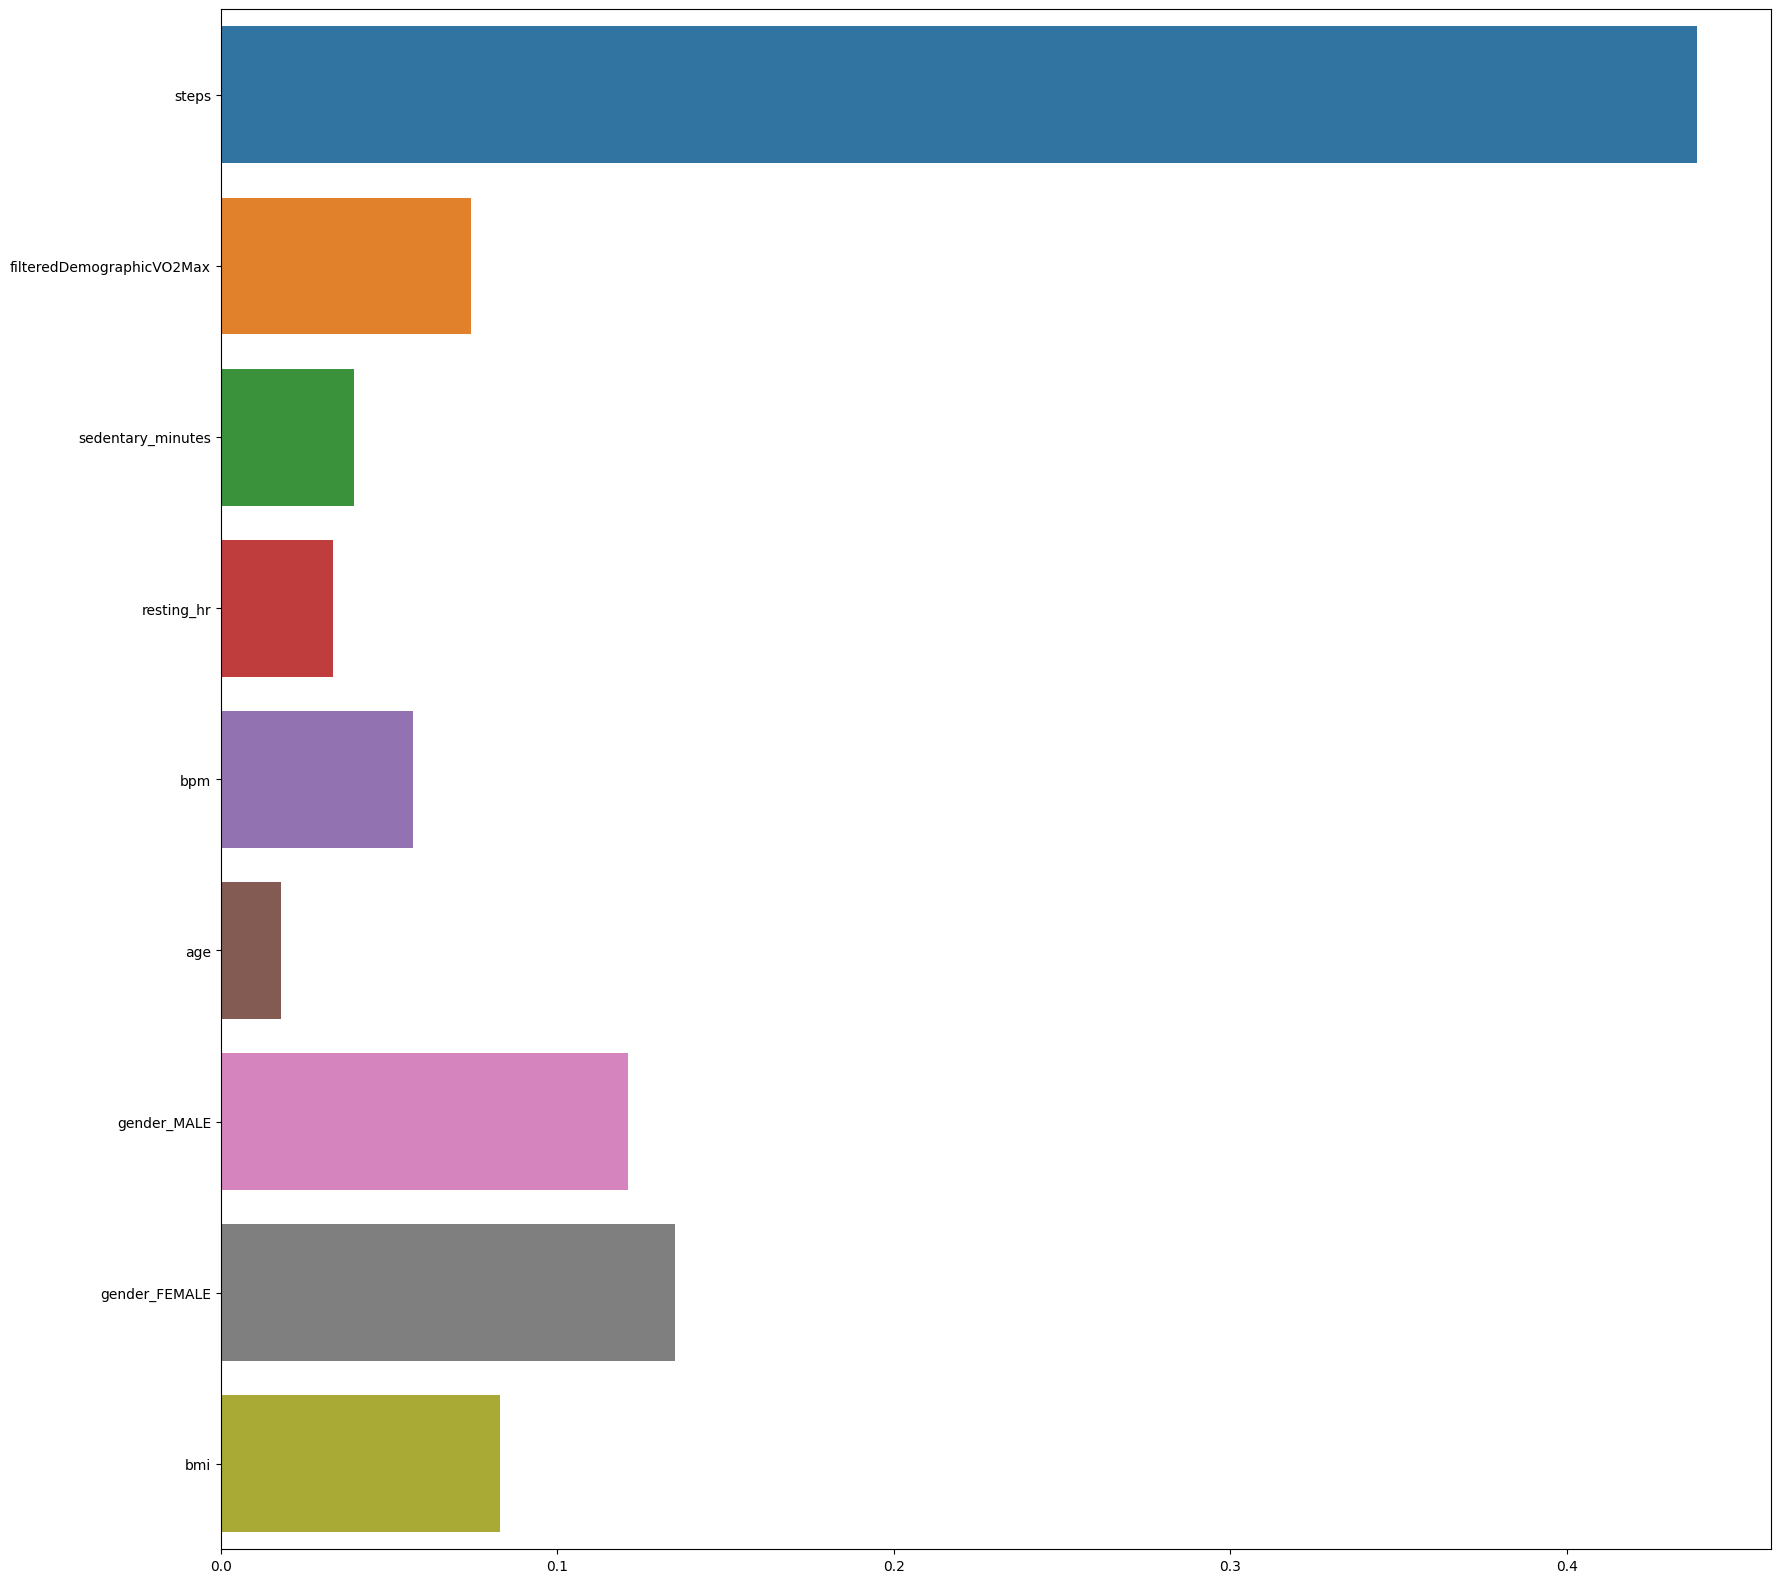

In [62]:
plt.figure(figsize=(20, 20))
sns.barplot(x=random_forest.feature_importances_, y=training_features)


Text(0.5, 1.0, 'Random Forest Regression')

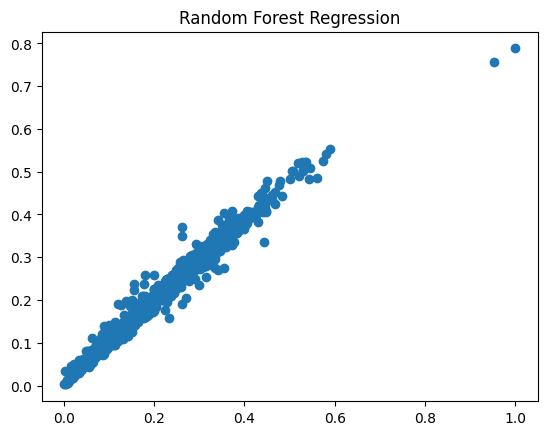

In [63]:
plt.scatter(y_train, y_pred_train)
plt.title('Random Forest Regression')

Text(0.5, 1.0, 'Random Forest Regression')

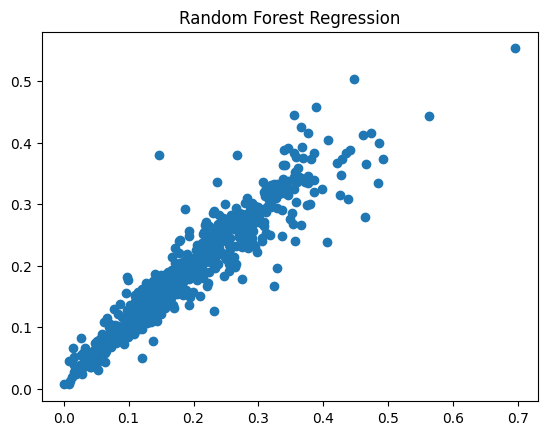

In [64]:
plt.scatter(y_test, y_pred_test)
plt.title('Random Forest Regression')

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor().fit(x_train, y_train)
y_pred_train = gradient_boosting.predict(x_train)
y_pred_test = gradient_boosting.predict(x_test)

print('Train r2 score = ', r2_score(y_train,y_pred_train))
print('Train MSE = ', mean_squared_error(y_train,y_pred_train))
print('Train MAE = ', mean_absolute_error(y_train,y_pred_train))
print('Train MAPE = ', mean_absolute_percentage_error(y_train,y_pred_train))

print('Test r2 score = ', r2_score(y_test,y_pred_test))
print('Test MSE = ', mean_squared_error(y_test,y_pred_test))
print('Test MAE = ', mean_absolute_error(y_test,y_pred_test))
print('Test MAPE = ', mean_absolute_percentage_error(y_test,y_pred_test))

Train r2 score =  0.9148918675236084
Train MSE =  0.0007271059966982053
Train MAE =  0.01909096092041786
Train MAPE =  0.1579205735937615
Test r2 score =  0.8635183511656666
Test MSE =  0.0013391316637304037
Test MAE =  0.024592910287463313
Test MAPE =  0.19318436528330676


Text(0.5, 1.0, 'Gradient Boosting Regression')

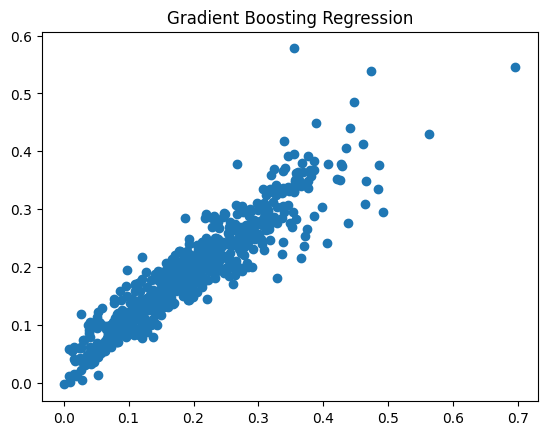

In [66]:
plt.scatter(y_test, y_pred_test)
plt.title('Gradient Boosting Regression')